# __Tugas Besar 1 Pembelajaran Mesin__

Kelompok 52

Group Member:
- Satriadhikara Panji Yudhistira (13522125)
- Mohammad Andhika Fadillah (13522128)
- Farrel Natha Saskoro (13522145)

## Import Libraries and Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from core.neural_network import NeuralNetwork
from core.loss_functions import (
    CategoricalCrossEntropy,
    BinaryCrossEntropy,
    MeanSquaredError,
)
from core.weight_initializers import (
    ZeroInitializer,
    UniformInitializer,
    NormalInitializer,
    XavierInitializer,
    HeInitializer,
)
from core.activations import (
    Linear,
    Sigmoid,
    ReLU,
    Tanh,
    Softmax,
    Swish,
    GELU,
)


## Setup Dataset

In [5]:
# Load dataset
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target

y = y.astype(np.int8)
X = X.to_numpy()
y = y.to_numpy()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

def to_categorical(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

Loading MNIST dataset...


## Base Model

In [6]:
# Test base model
model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history = model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred = model.forward(X_test)
pred_classes = np.argmax(pred, axis=1)
accuracy = np.mean(pred_classes == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9281


## HyperParameter Experiment

### Pengaruh Depth dan Width

#### Variasi pada Depth

Training model depth configurations 1
Test Accuracy (Depth): 0.9366

Training model depth configurations 2
Test Accuracy (Depth 2): 0.9455

Training model depth configurations 3
Test Accuracy (Depth 3): 0.9529


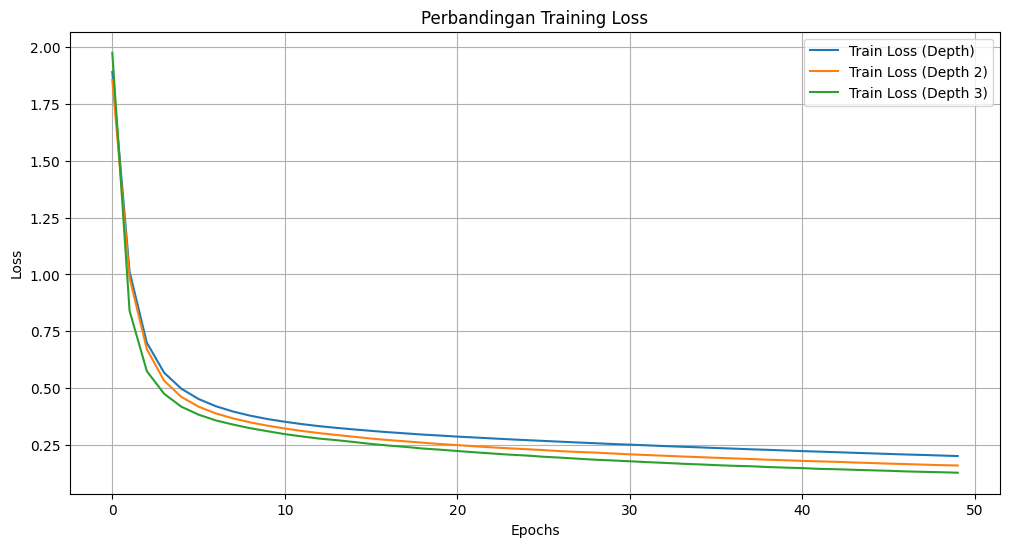

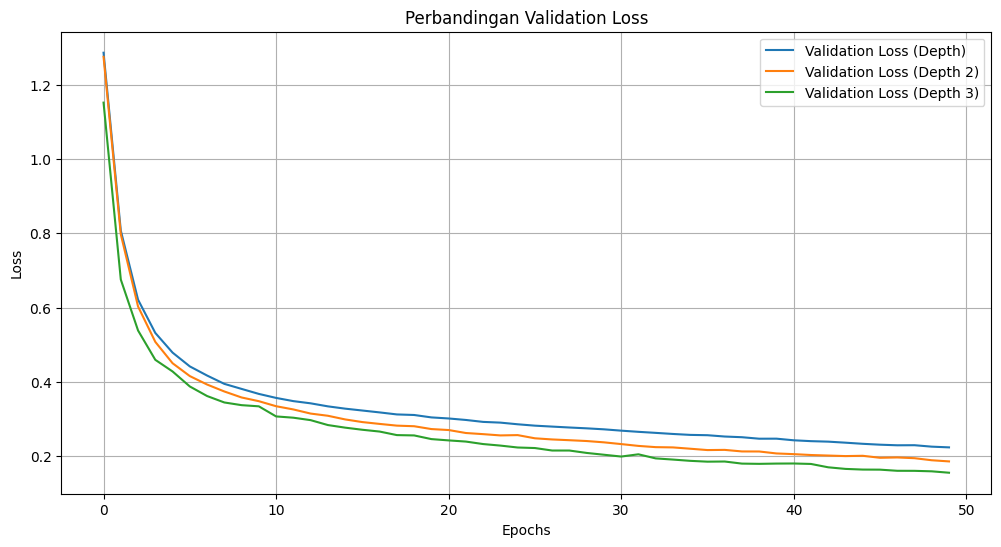

In [7]:
print("Training model depth configurations 1")
model_depth = NeuralNetwork(
    layer_sizes=[784, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth = model_depth.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred_depth = model_depth.forward(X_test)
pred_classes_depth = np.argmax(pred_depth, axis=1)
accuracy_depth = np.mean(pred_classes_depth == y_test)
print(f"Test Accuracy (Depth): {accuracy_depth:.4f}\n")

print("Training model depth configurations 2")
model_depth_2 = NeuralNetwork(
    layer_sizes=[784, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_2 = model_depth_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred_depth_2 = model_depth_2.forward(X_test)
pred_classes_depth_2 = np.argmax(pred_depth_2, axis=1)
accuracy_depth_2 = np.mean(pred_classes_depth_2 == y_test)
print(f"Test Accuracy (Depth 2): {accuracy_depth_2:.4f}\n")

print("Training model depth configurations 3")
model_depth_3 = NeuralNetwork(
    layer_sizes=[784, 512, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_3 = model_depth_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred_depth_3 = model_depth_3.forward(X_test)
pred_classes_depth_3 = np.argmax(pred_depth_3, axis=1)
accuracy_depth_3 = np.mean(pred_classes_depth_3 == y_test)
print(f"Test Accuracy (Depth 3): {accuracy_depth_3:.4f}")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["train_loss"], label="Train Loss (Depth)"
)
plt.plot(
    history_depth_2["train_loss"], label="Train Loss (Depth 2)"
)
plt.plot(
    history_depth_3["train_loss"], label="Train Loss (Depth 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["val_loss"], label="Validation Loss (Depth)"
)
plt.plot(
    history_depth_2["val_loss"], label="Validation Loss (Depth 2)"
)
plt.plot(
    history_depth_3["val_loss"], label="Validation Loss (Depth 3)"
)
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#### Variasi pada Width

Training model width configurations 1
Test Accuracy (Width): 0.9287

Training model width configurations 2
Test Accuracy (Width 2): 0.9249

Training model width configurations 3
Test Accuracy (Width 3): 0.9286


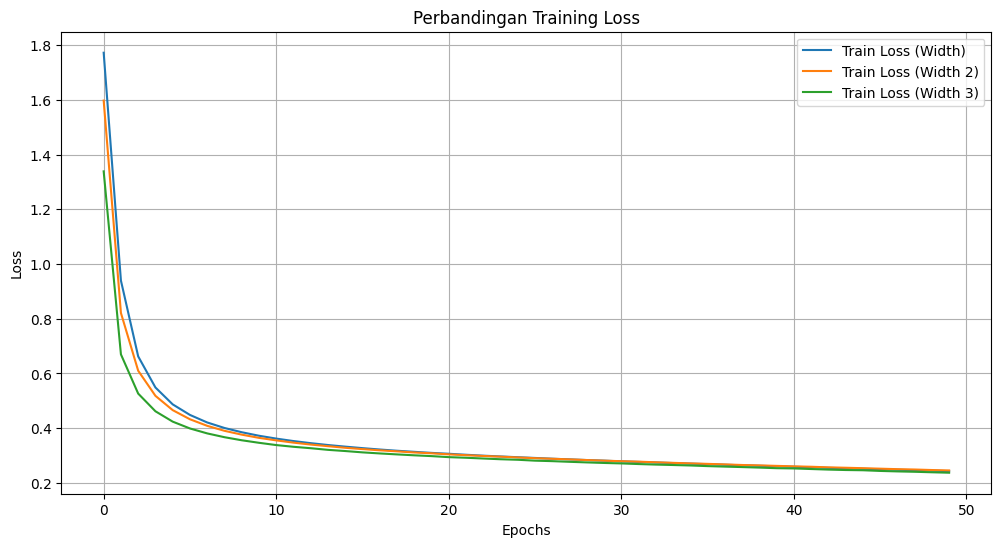

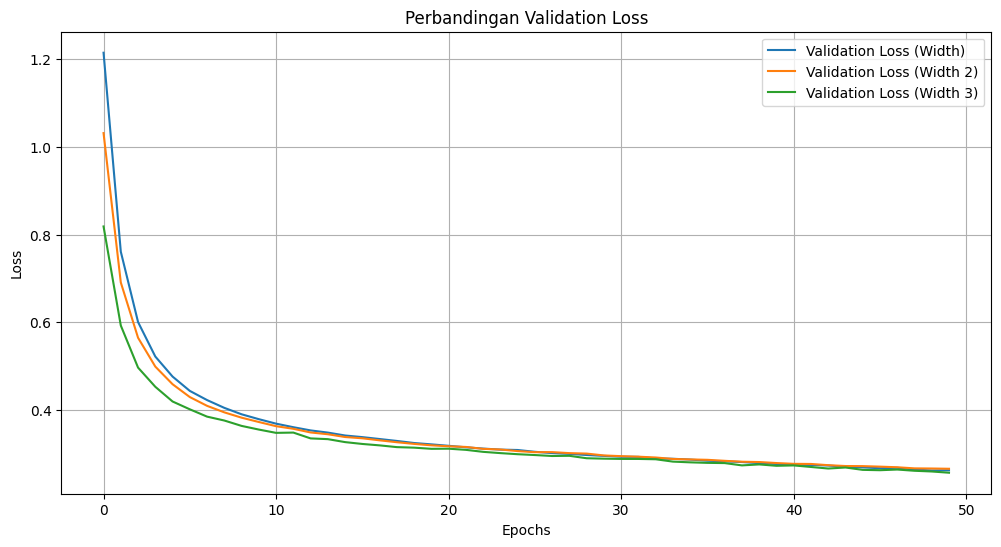

In [8]:
print("Training model width configurations 1")
model_width = NeuralNetwork(
    layer_sizes=[784, 256, 256, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width = model_width.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred_width = model_width.forward(X_test)
pred_classes_width = np.argmax(pred_width, axis=1)
accuracy_width = np.mean(pred_classes_width == y_test)
print(f"Test Accuracy (Width): {accuracy_width:.4f}\n")

print("Training model width configurations 2")
model_width_2 = NeuralNetwork(
    layer_sizes=[784, 512, 512, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_2 = model_width_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred_width_2 = model_width_2.forward(X_test)
pred_classes_width_2 = np.argmax(pred_width_2, axis=1)
accuracy_width_2 = np.mean(pred_classes_width_2 == y_test)
print(f"Test Accuracy (Width 2): {accuracy_width_2:.4f}\n")

print("Training model width configurations 3")
model_width_3 = NeuralNetwork(
    layer_sizes=[784, 1024, 1024, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_3 = model_width_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)

pred_width_3 = model_width_3.forward(X_test)
pred_classes_width_3 = np.argmax(pred_width_3, axis=1)
accuracy_width_3 = np.mean(pred_classes_width_3 == y_test)
print(f"Test Accuracy (Width 3): {accuracy_width_3:.4f}")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["train_loss"], label="Train Loss (Width)"
)
plt.plot(
    history_width_2["train_loss"], label="Train Loss (Width 2)"
)
plt.plot(
    history_width_3["train_loss"], label="Train Loss (Width 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["val_loss"], label="Validation Loss (Width)"
)
plt.plot(
    history_width_2["val_loss"], label="Validation Loss (Width 2)"
)
plt.plot(
    history_width_3["val_loss"], label="Validation Loss (Width 3)"
)
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Pengaruh Fungsi Aktivasi Hidden Layer

Training model with activation linear
Test Accuracy (Activation linear): 0.9245

Training model with activation relu
Test Accuracy (Activation relu): 0.9275

Training model with activation sigmoid
Test Accuracy (Activation sigmoid): 0.8979

Training model with activation tanh
Test Accuracy (Activation tanh): 0.9281

Training model with activation swish
Test Accuracy (Activation swish): 0.9230

Training model with activation gelu
Test Accuracy (Activation gelu): 0.9274



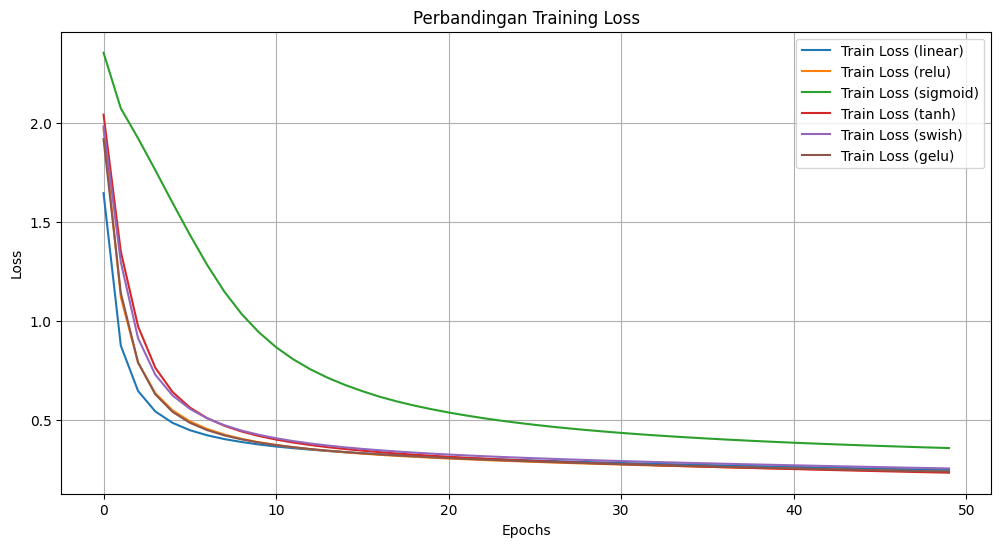

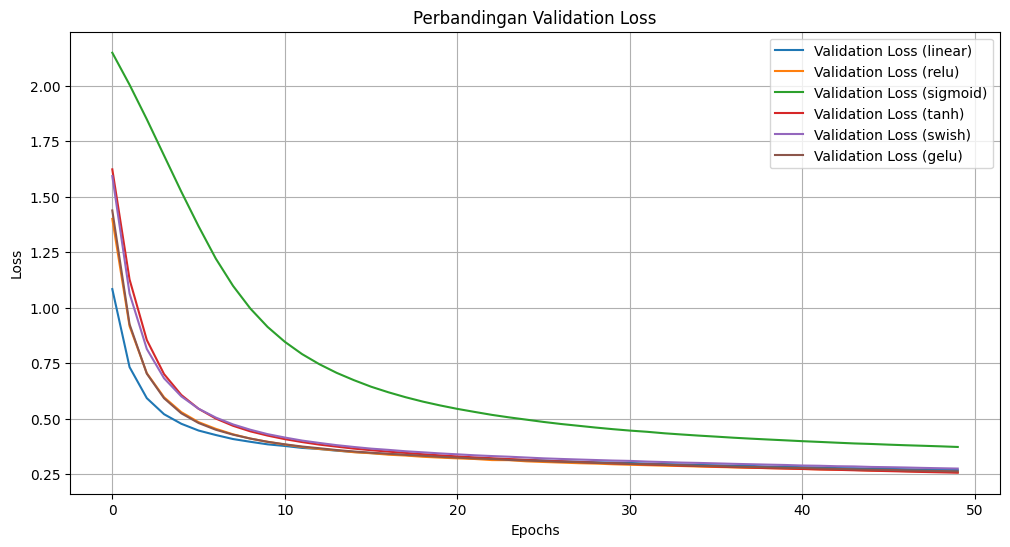


--- Individual Weight Distributions ---

Weight Distribution for linear activation:


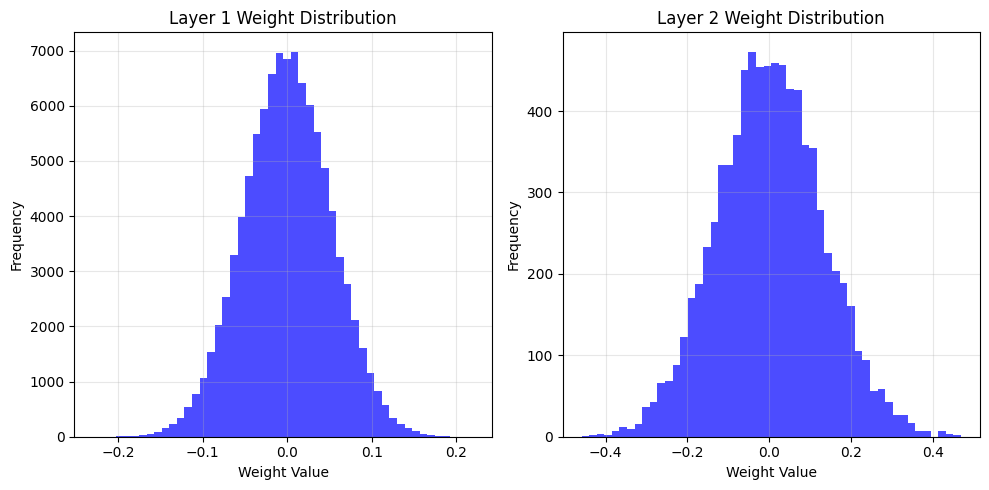


Weight Distribution for relu activation:


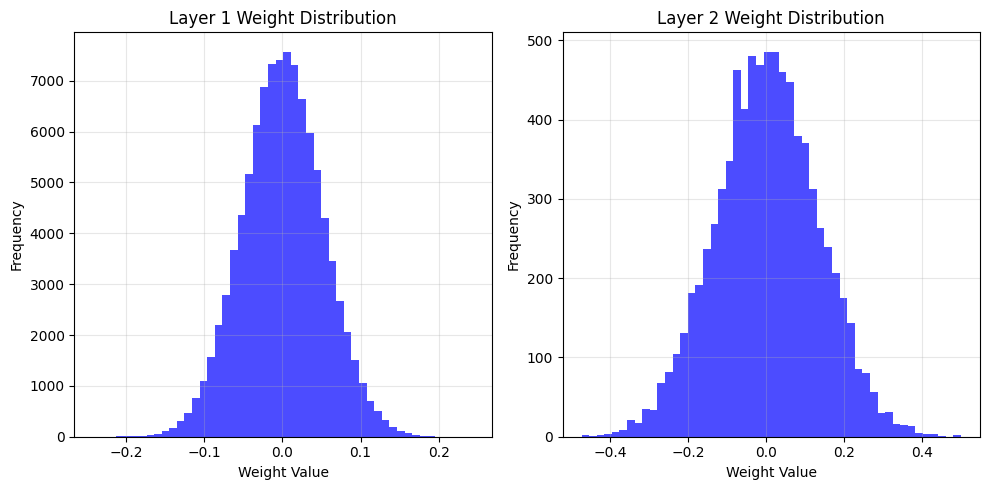


Weight Distribution for sigmoid activation:


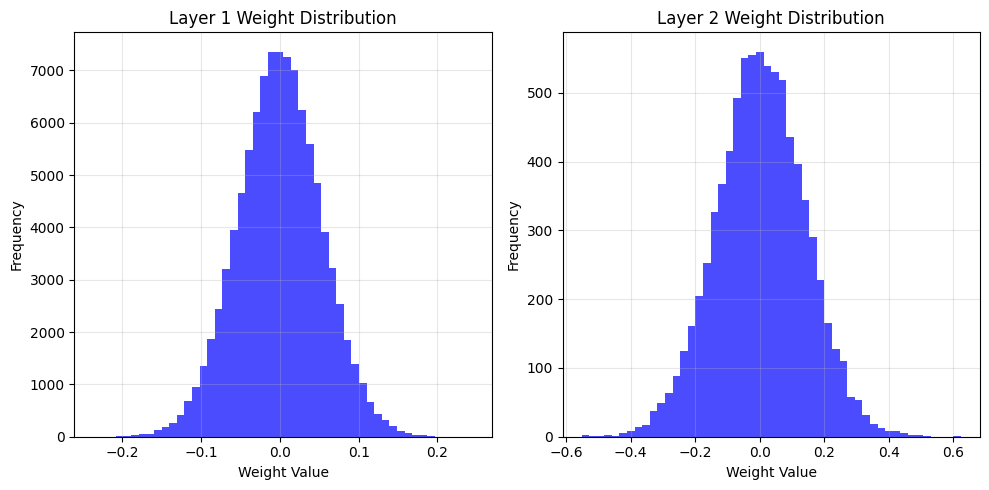


Weight Distribution for tanh activation:


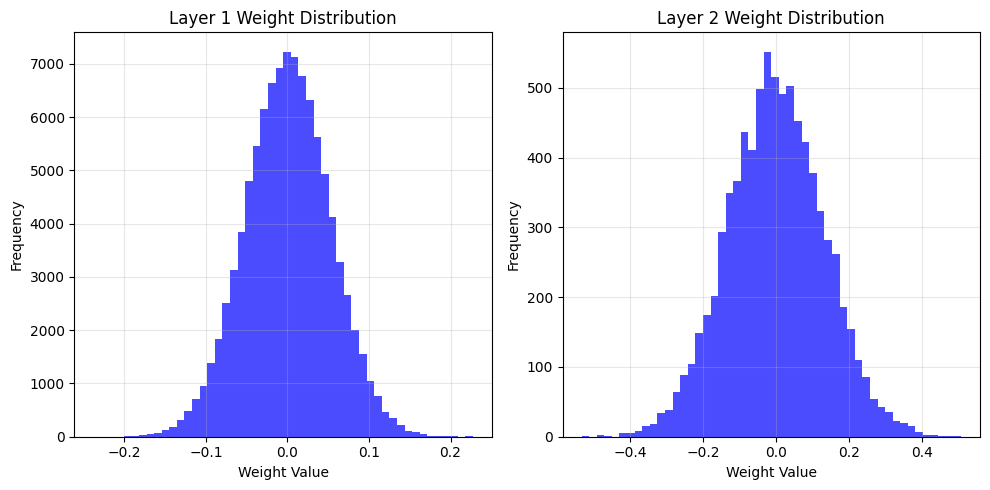


Weight Distribution for swish activation:


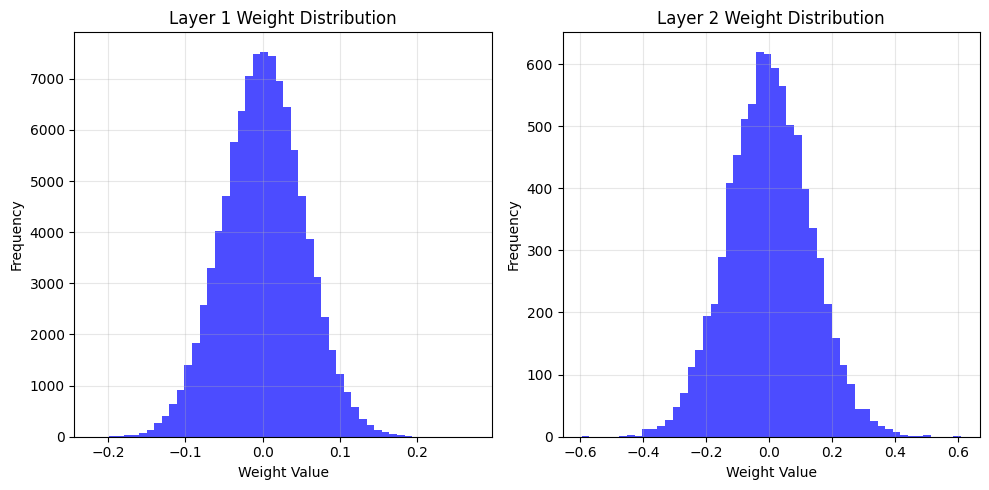


Weight Distribution for gelu activation:


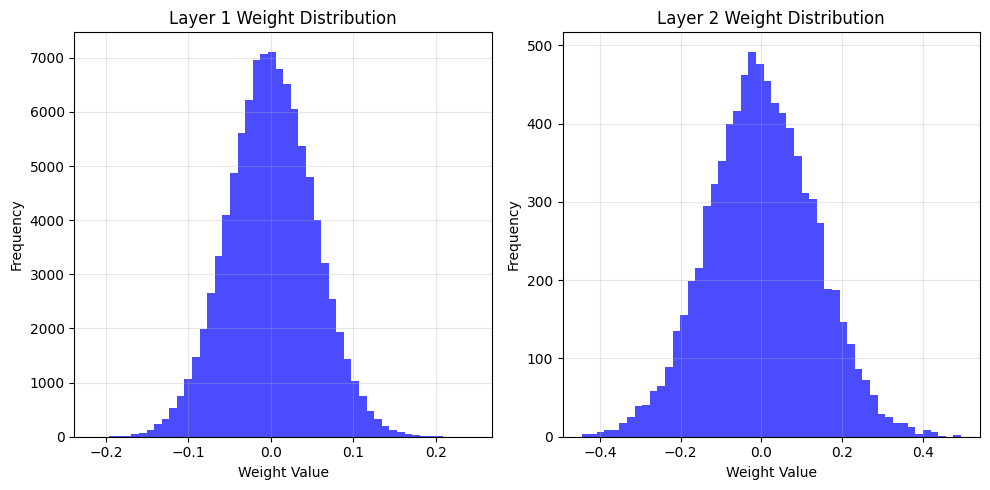


--- Individual Gradient Distributions ---

Gradient Distribution for linear activation:


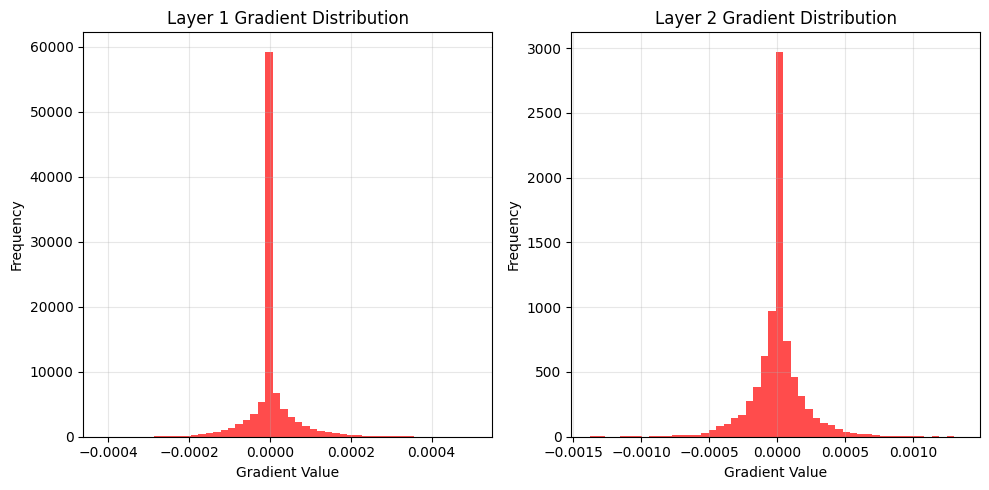


Gradient Distribution for relu activation:


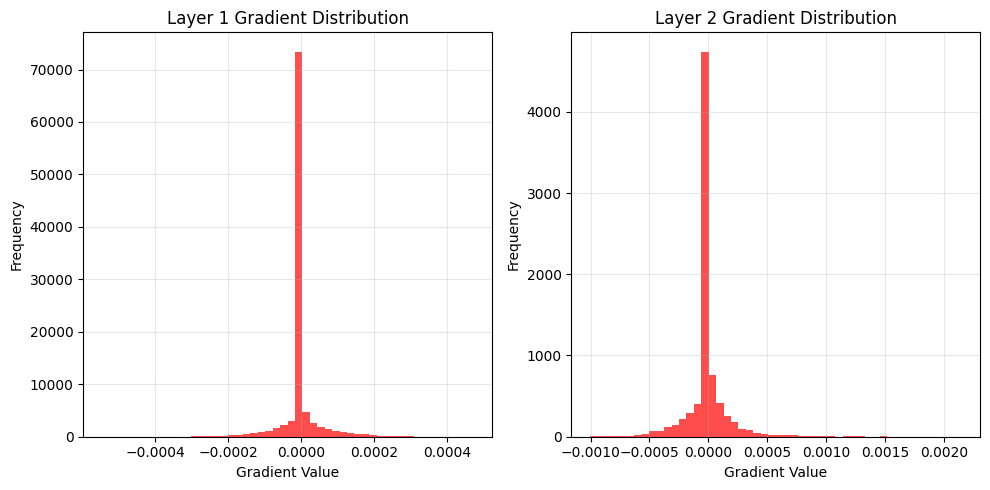


Gradient Distribution for sigmoid activation:


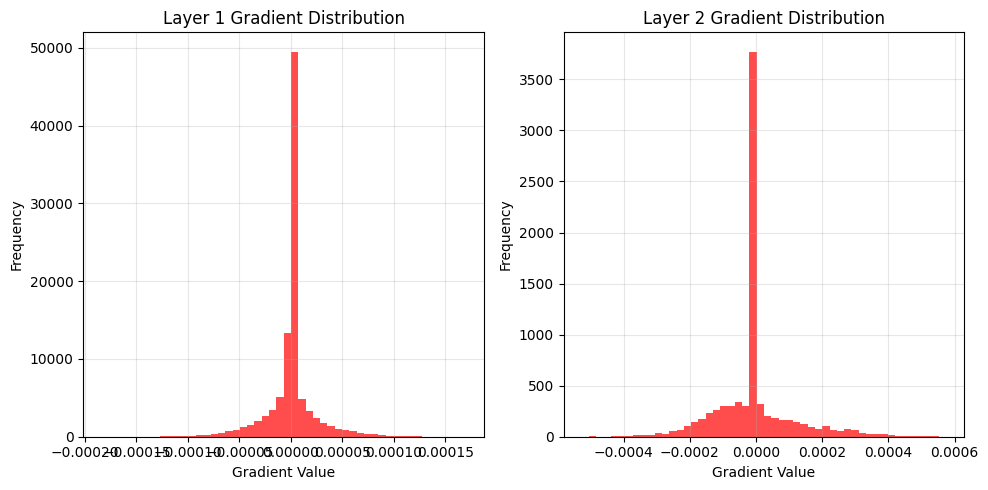


Gradient Distribution for tanh activation:


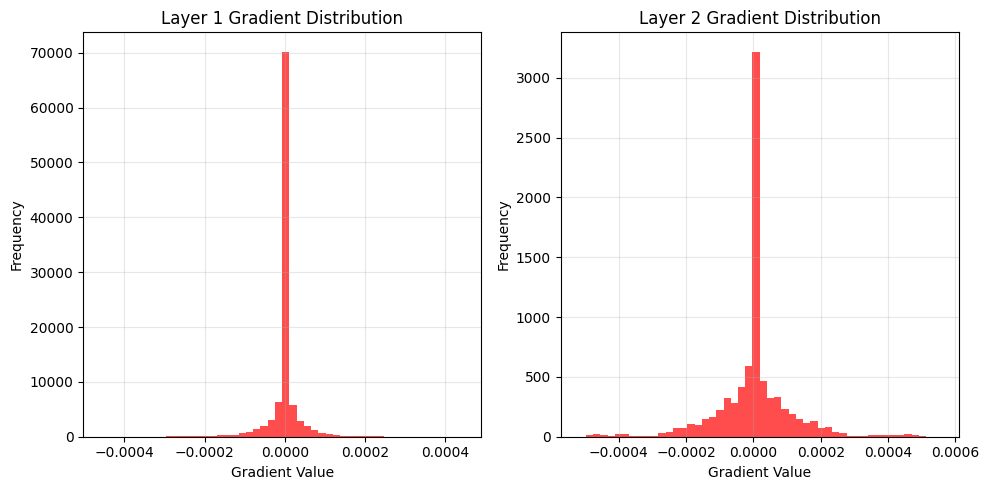


Gradient Distribution for swish activation:


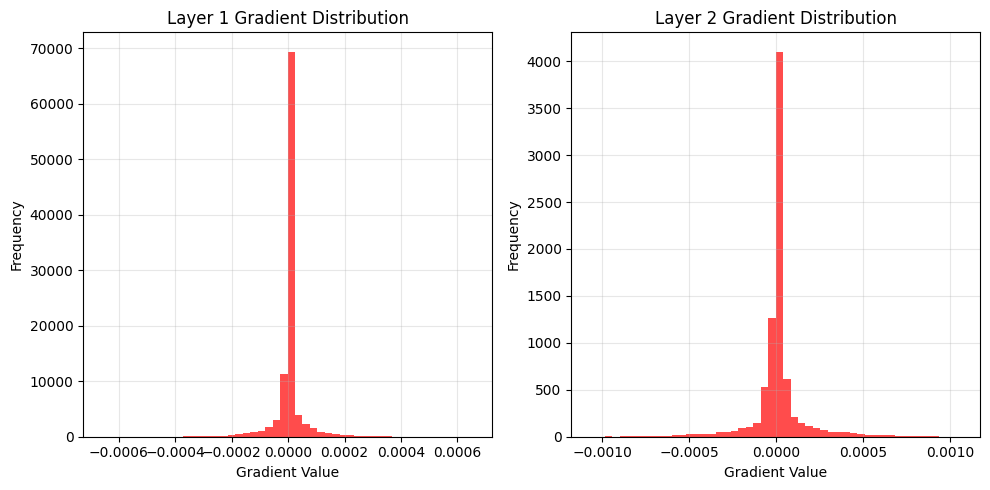


Gradient Distribution for gelu activation:


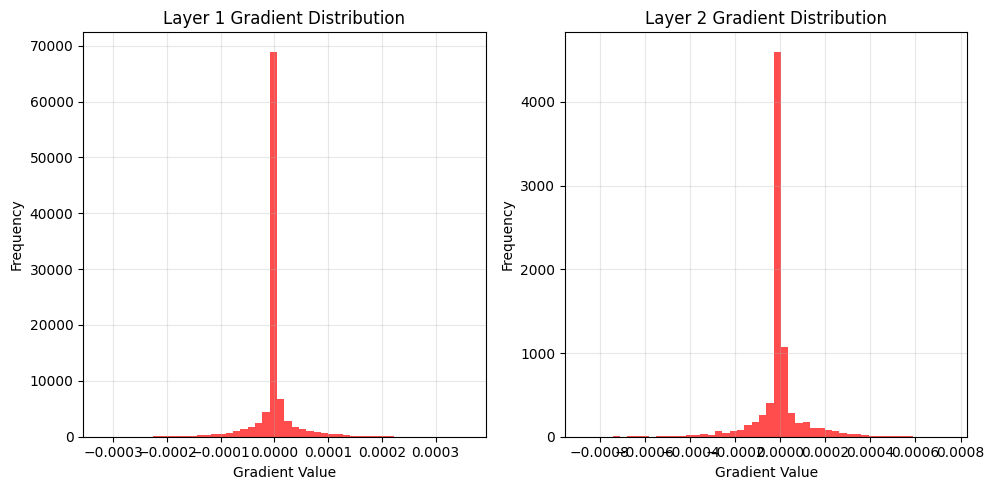

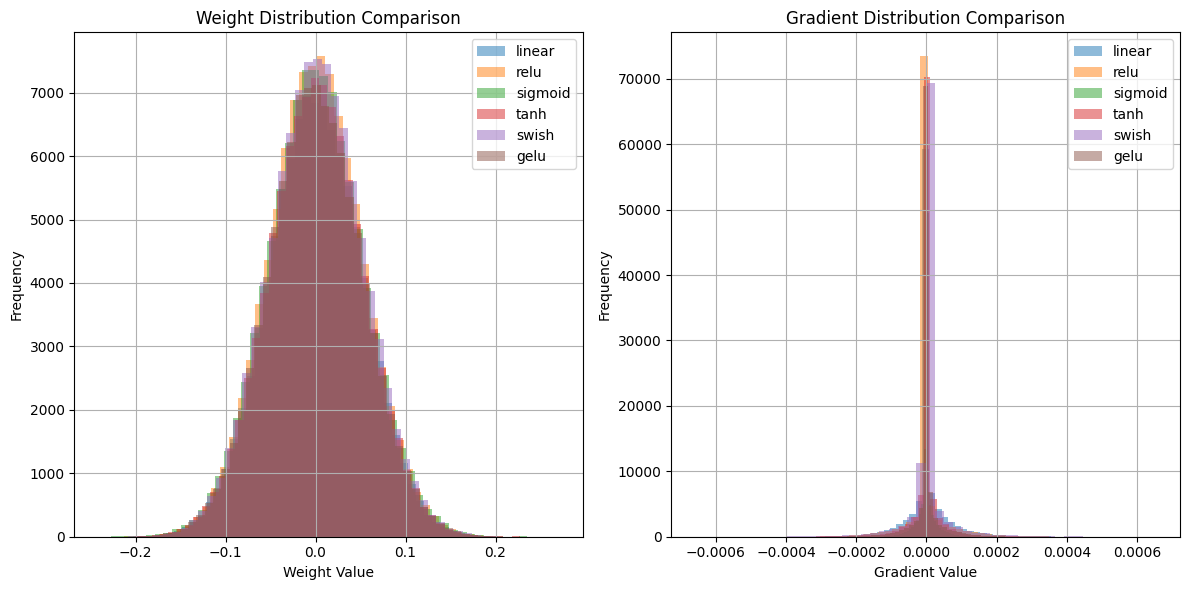


--- Accuracy Summary ---
Activation linear: 0.9245
Activation relu: 0.9275
Activation sigmoid: 0.8979
Activation tanh: 0.9281
Activation swish: 0.9230
Activation gelu: 0.9274


In [9]:
activation_models = {}
activation_histories = {}
activation_accuracies = {}

# List fungsi aktivasi
activations = ["linear", "relu", "sigmoid", "tanh", "swish", "gelu"]

for activation in activations:
    print(f"Training model with activation {activation}")

    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, activation, "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )

    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=0,
        early_stopping_patience=3,
    )

    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    activation_models[activation] = model
    activation_histories[activation] = history
    activation_accuracies[activation] = accuracy
    
    print(f"Test Accuracy (Activation {activation}): {accuracy:.4f}\n")

# Plot perbandingan train loss untuk semua aktivasi
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(
        activation_histories[activation]["train_loss"], 
        label=f"Train Loss ({activation})"
    )
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss untuk semua aktivasi
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(
        activation_histories[activation]["val_loss"], 
        label=f"Validation Loss ({activation})"
    )
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for activation, model in activation_models.items():
    print(f"\nWeight Distribution for {activation} activation:")
    model.plot_weight_distribution([0, 1])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for activation, model in activation_models.items():
    print(f"\nGradient Distribution for {activation} activation:")
    model.plot_gradient_distribution([0, 1])


plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=activation
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for activation, model in activation_models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=activation,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\n--- Accuracy Summary ---")
for activation, accuracy in activation_accuracies.items():
    print(f"Activation {activation}: {accuracy:.4f}")

### Pengaruh Learning Rate

Training model with learning rate: 0.001
Test Accuracy (Learning Rate 0.001): 0.8654

Training model with learning rate: 0.01
Test Accuracy (Learning Rate 0.01): 0.9227

Training model with learning rate: 0.1
Test Accuracy (Learning Rate 0.1): 0.9692



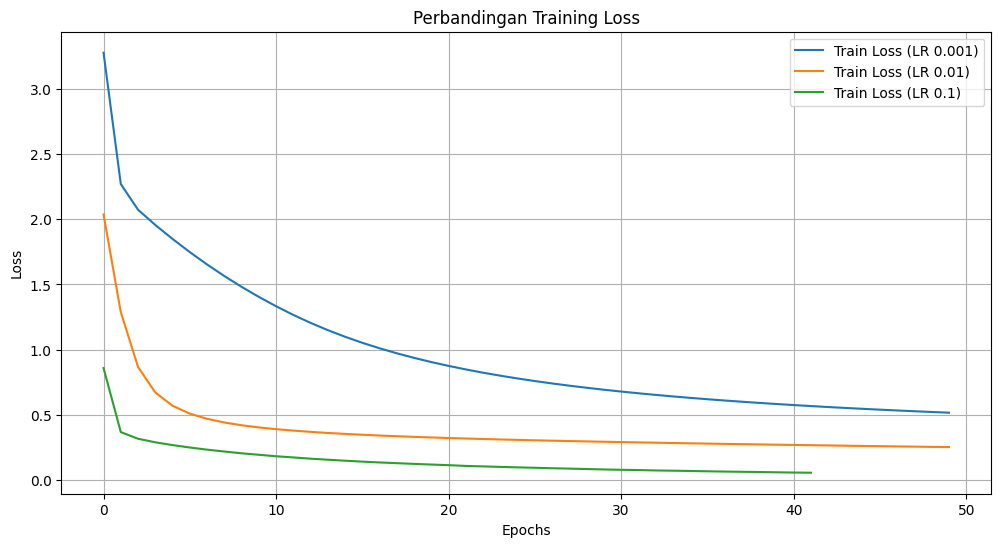

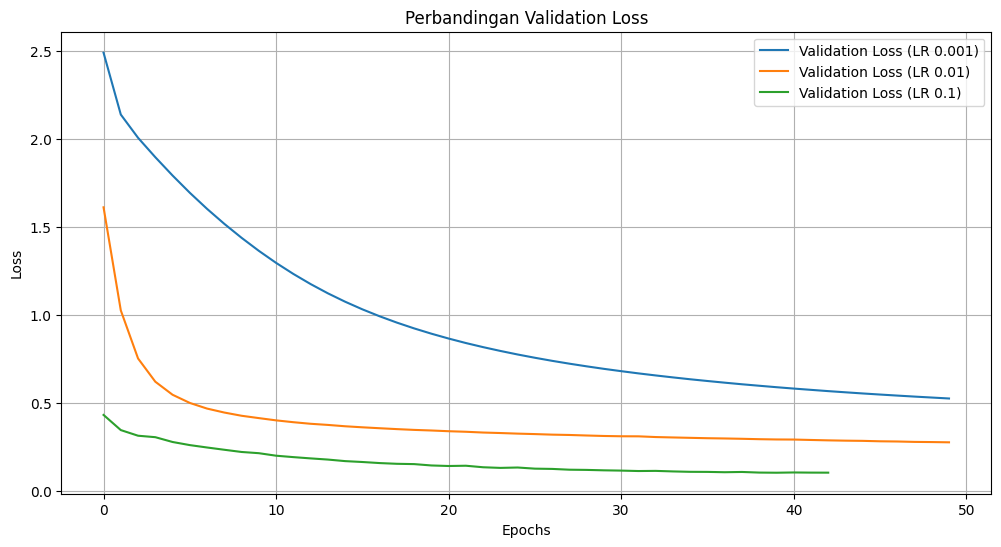

Weight Distributions by Learning Rate:

Model with Learning Rate: 0.001


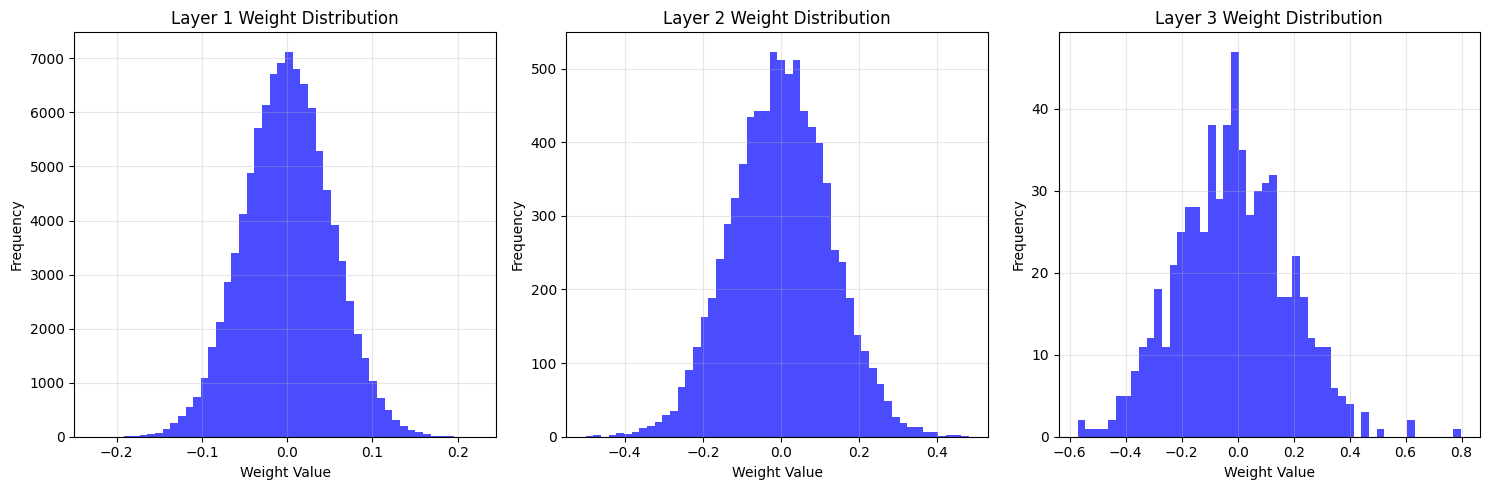


Model with Learning Rate: 0.01


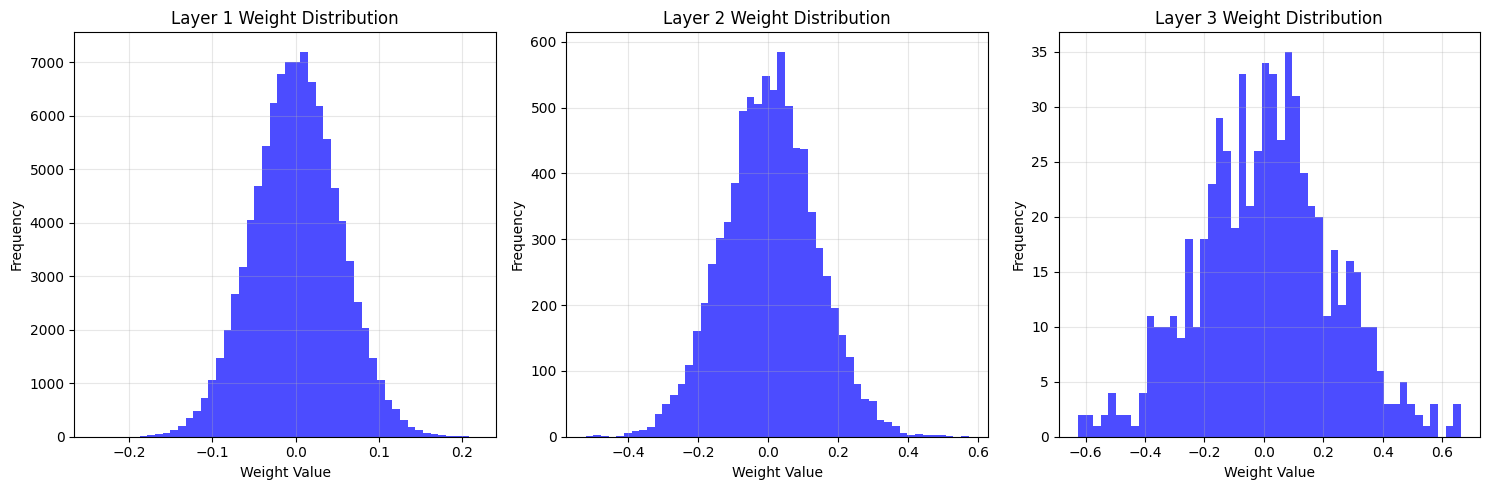


Model with Learning Rate: 0.1


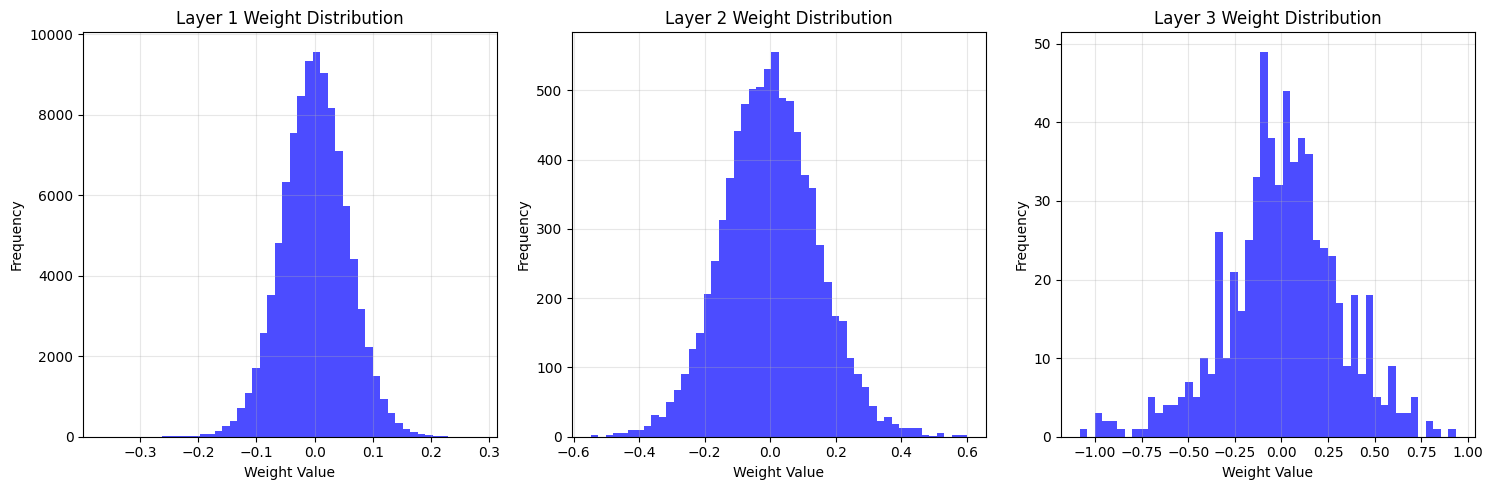


Gradient Distributions by Learning Rate:

Model with Learning Rate: 0.001


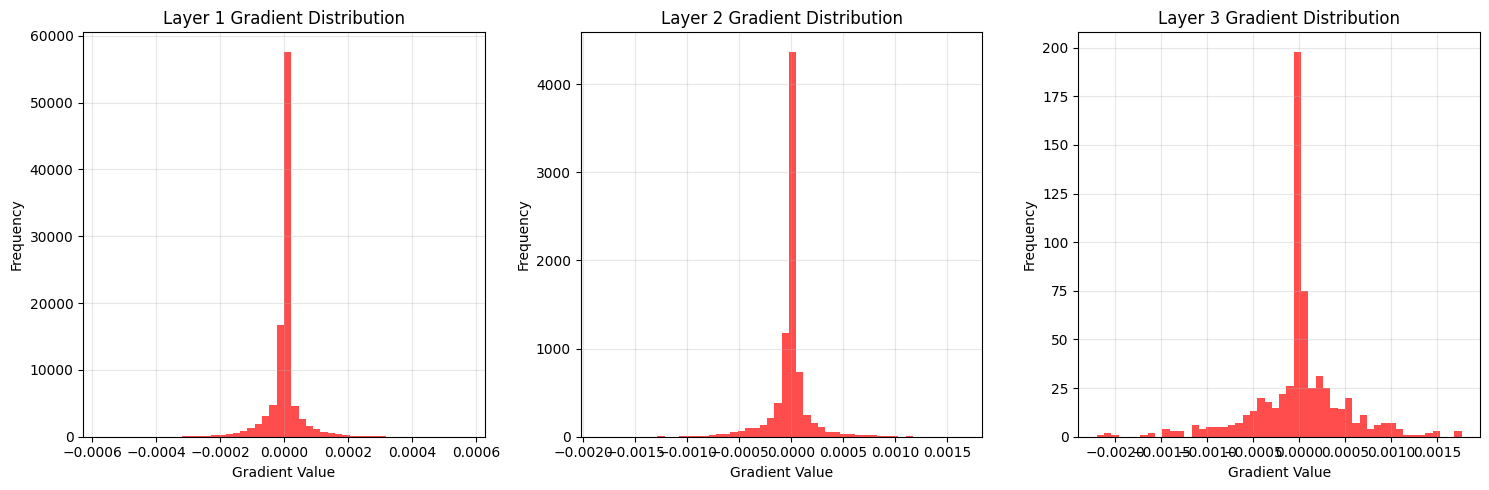


Model with Learning Rate: 0.01


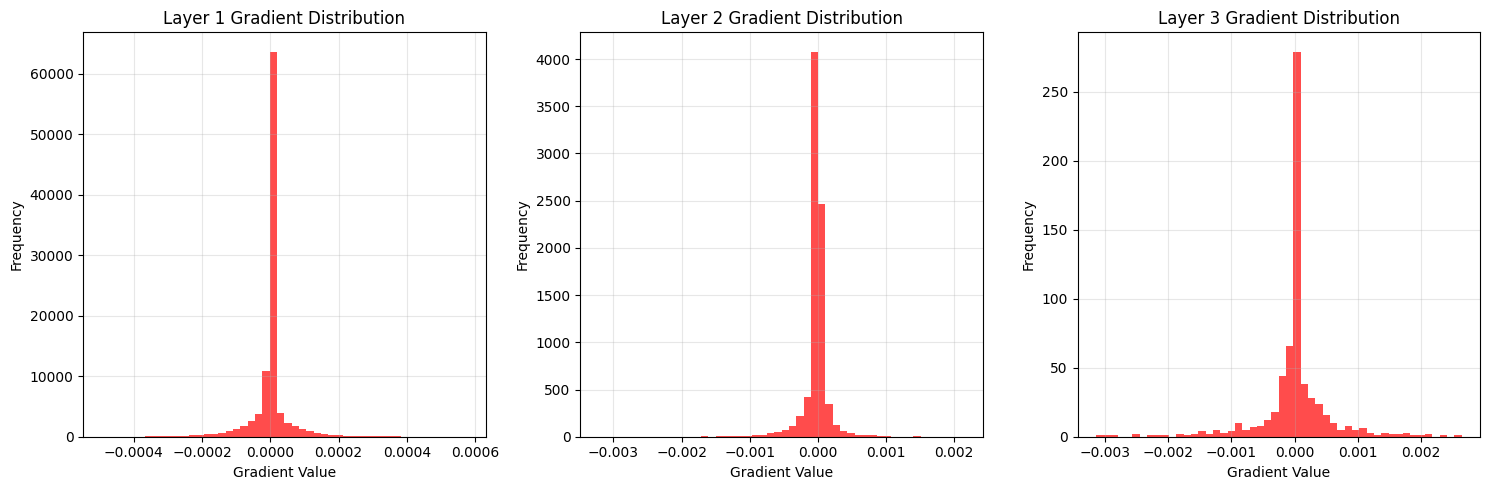


Model with Learning Rate: 0.1


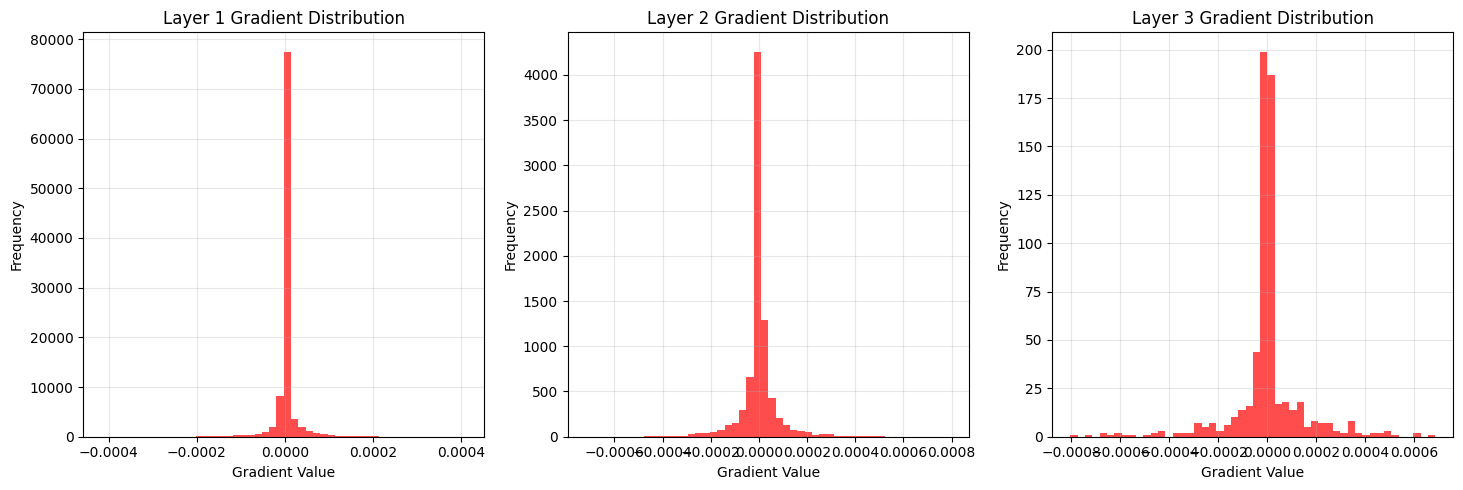

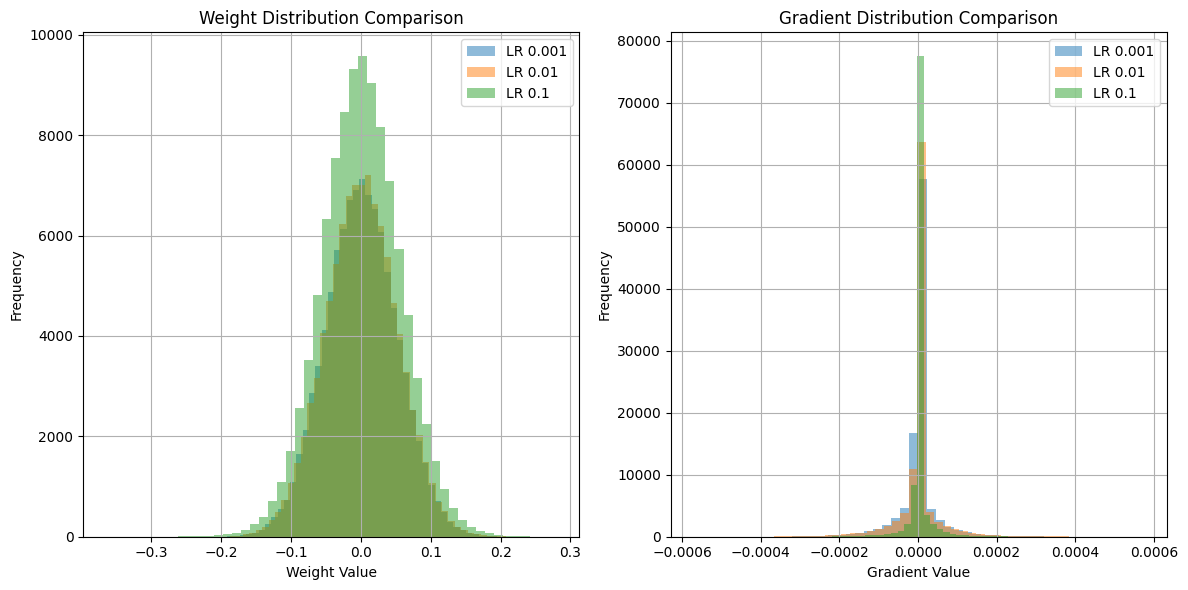


--- Accuracy Summary ---
Learning Rate 0.001: 0.8654
Learning Rate 0.01: 0.9227
Learning Rate 0.1: 0.9692


In [10]:
# Variasi learning rate
learning_rates = [0.001, 0.01, 0.1]
results = {}
histories = {}
models = {}

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model_lr = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    history_lr = model_lr.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=lr,
        epochs=50,
        momentum=0.9,
        verbose=0,
        early_stopping_patience=3,
    )
    histories[lr] = history_lr
    models[lr] = model_lr
    pred_lr = model_lr.forward(X_test)
    pred_classes_lr = np.argmax(pred_lr, axis=1)
    accuracy_lr = np.mean(pred_classes_lr == y_test)
    results[lr] = accuracy_lr
    print(f"Test Accuracy (Learning Rate {lr}): {accuracy_lr:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["train_loss"], label="Train Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["train_loss"], label="Train Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["train_loss"], label="Train Loss (LR 0.1)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["val_loss"], label="Validation Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["val_loss"], label="Validation Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["val_loss"], label="Validation Loss (LR 0.1)"
)
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot
print("Weight Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien
print("\nGradient Distributions by Learning Rate:")
for lr, model in models.items():
    print(f"\nModel with Learning Rate: {lr}")
    model.plot_gradient_distribution([0, 1, 2])

# Plot perbandingan distribusi bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=f"LR {lr}"
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison")

for lr, model in models.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=f"LR {lr}",
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for lr, accuracy in results.items():
    print(f"Learning Rate {lr}: {accuracy:.4f}")


### Pengaruh Inisialisasi Bobot

Training model with Zero initializer
Test Accuracy (Zero Initializer): 0.1143

Training model with Uniform initializer
Test Accuracy (Uniform Initializer): 0.9109

Training model with Normal initializer
Test Accuracy (Normal Initializer): 0.9274

Training model with Xavier initializer
Test Accuracy (Xavier Initializer): 0.9261

Training model with He initializer
Test Accuracy (He Initializer): 0.9275



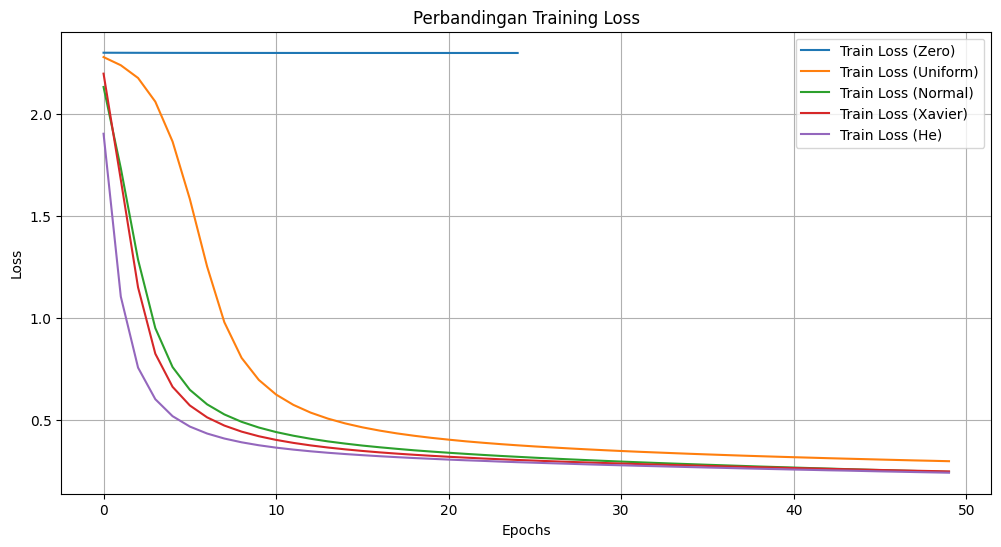

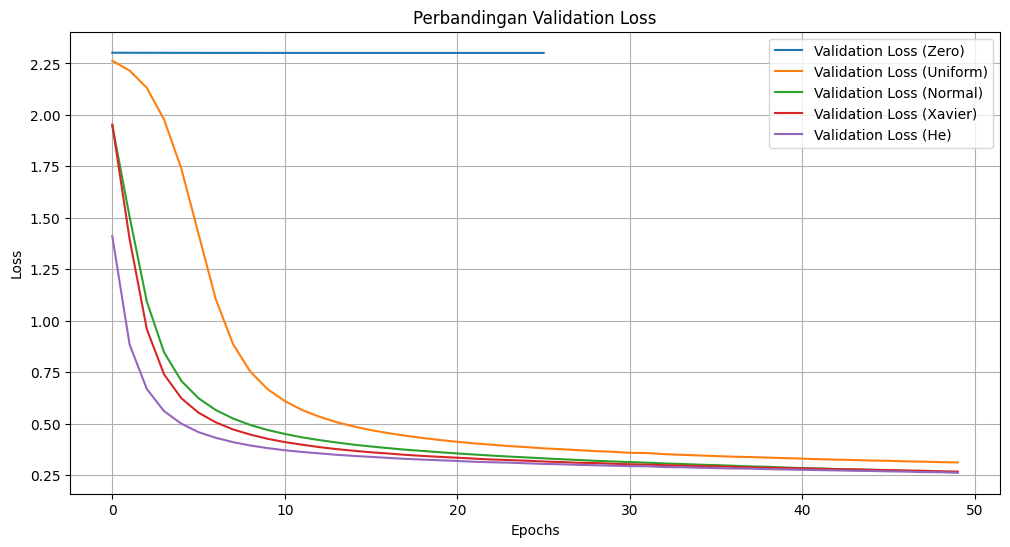


--- Individual Weight Distributions ---

Weight Distribution for Zero initializer:


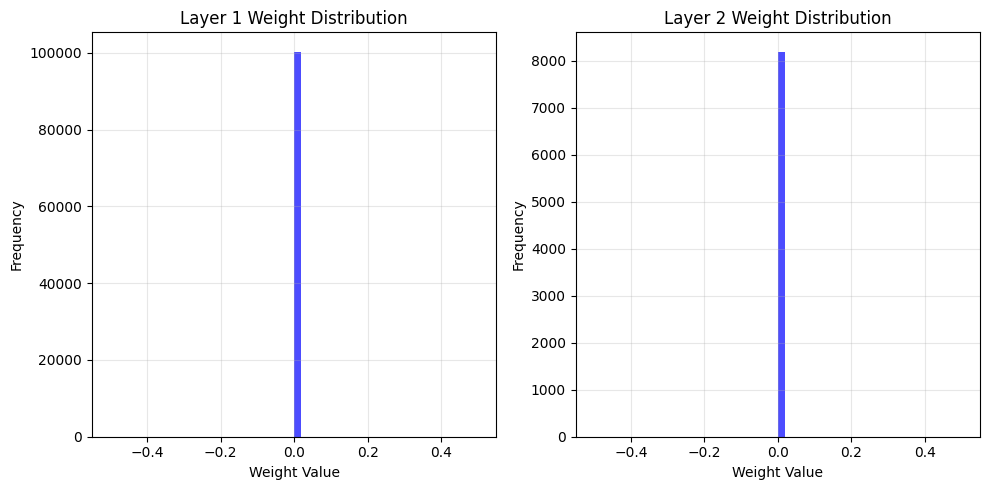


Weight Distribution for Uniform initializer:


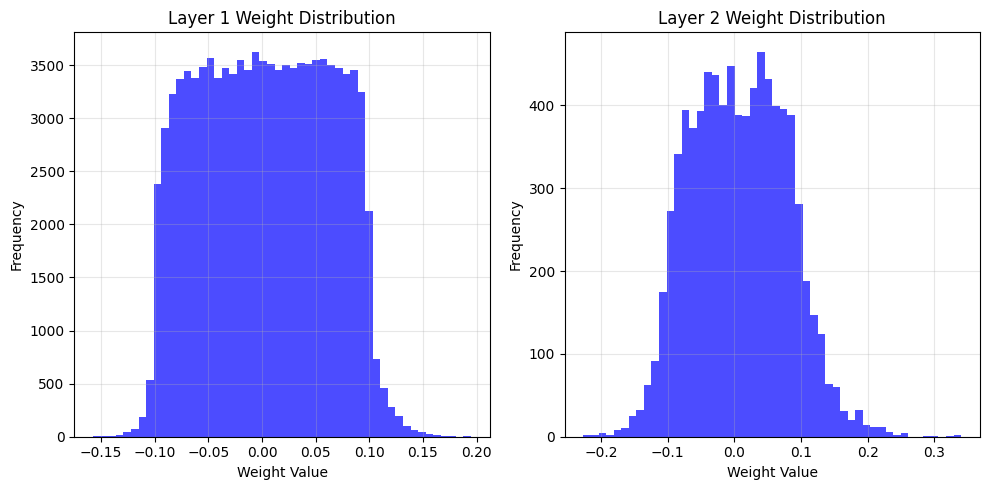


Weight Distribution for Normal initializer:


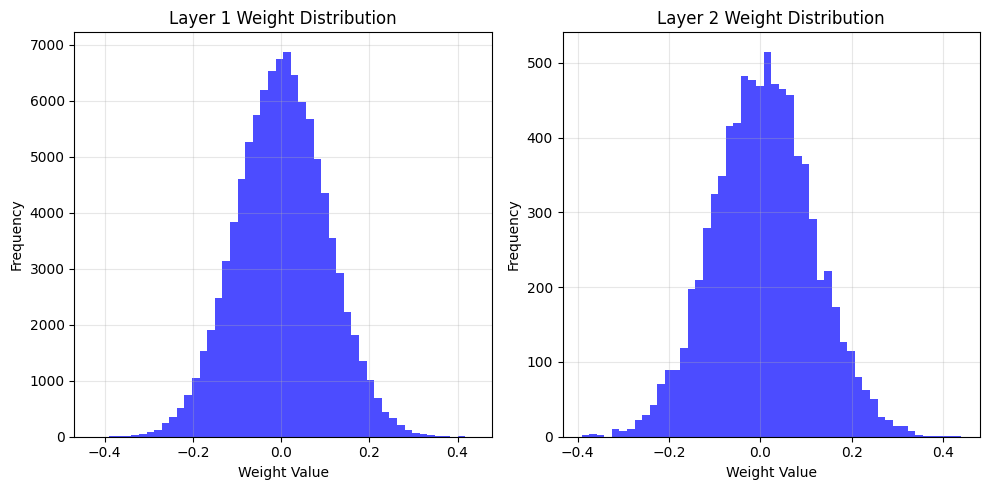


Weight Distribution for Xavier initializer:


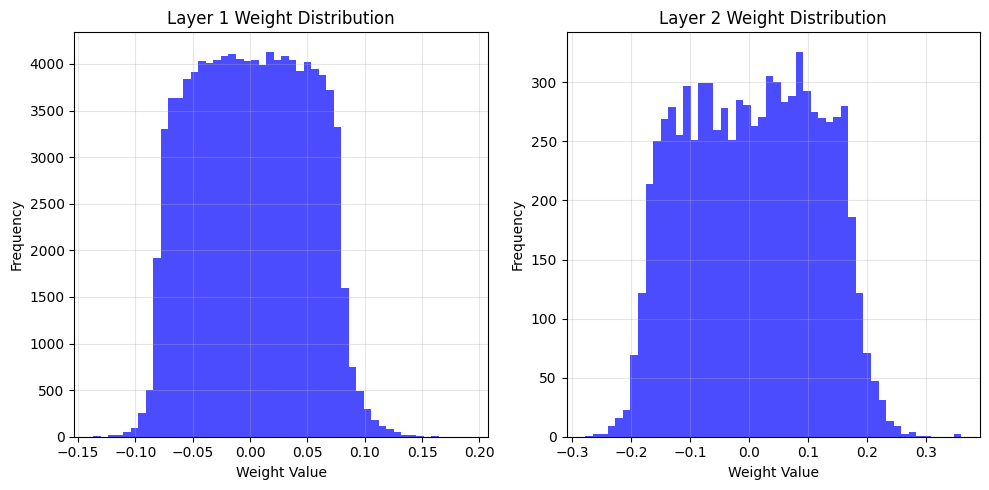


Weight Distribution for He initializer:


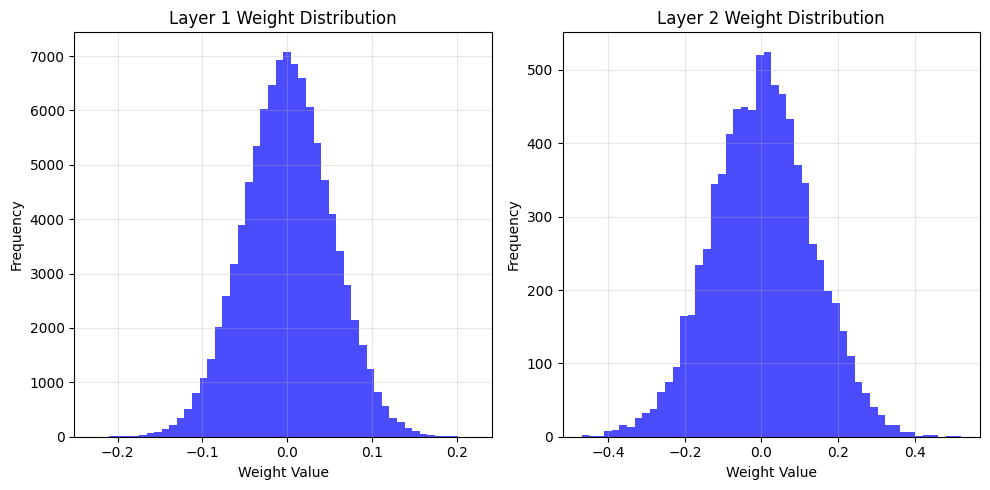


--- Individual Gradient Distributions ---

Gradient Distribution for Zero initializer:


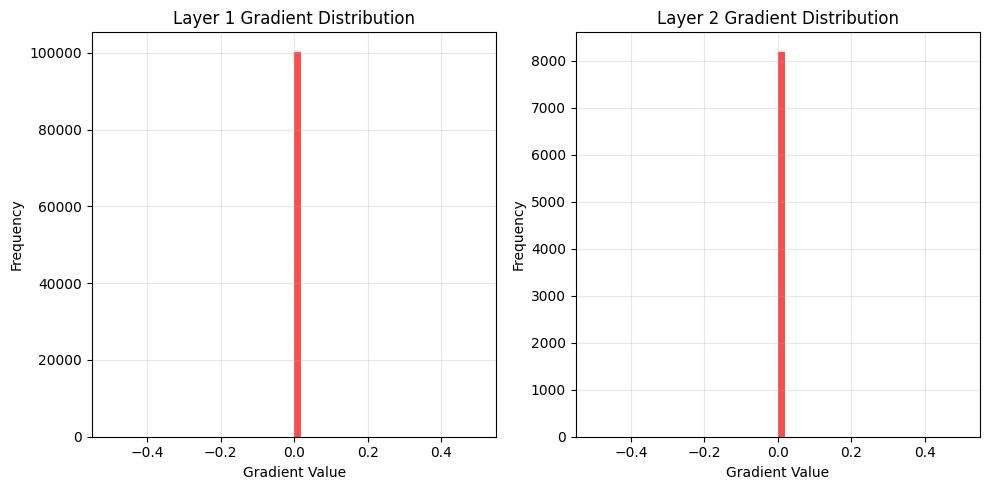


Gradient Distribution for Uniform initializer:


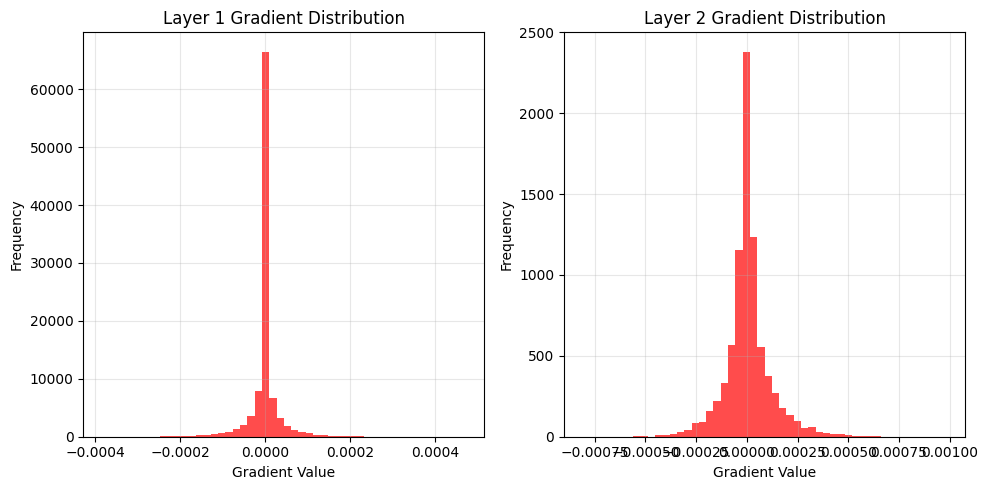


Gradient Distribution for Normal initializer:


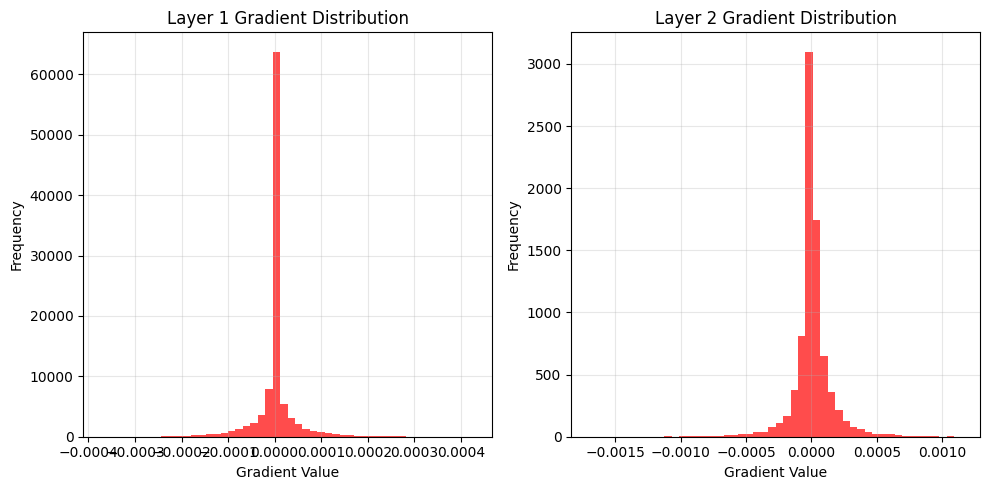


Gradient Distribution for Xavier initializer:


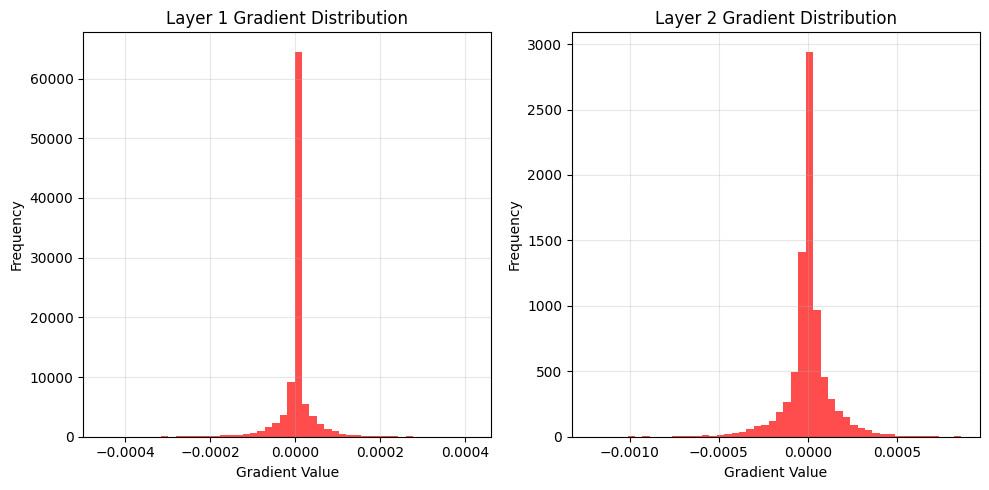


Gradient Distribution for He initializer:


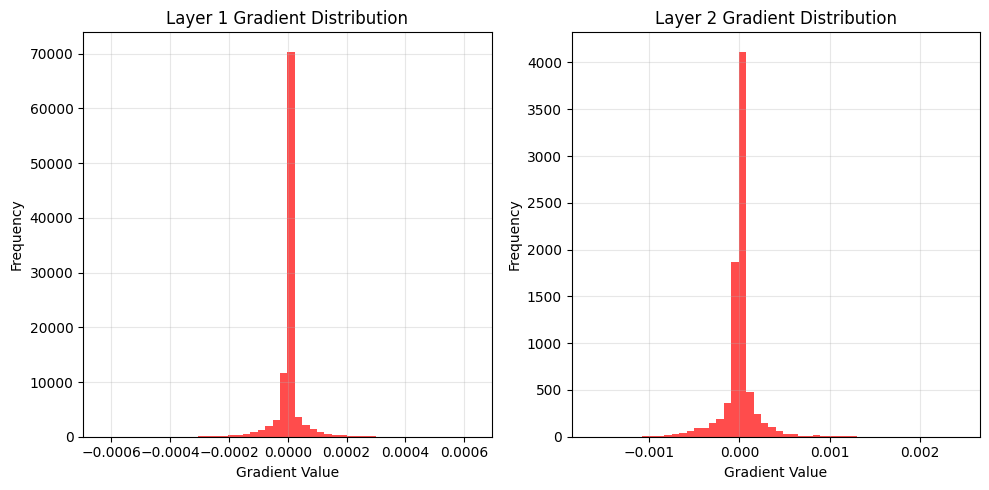

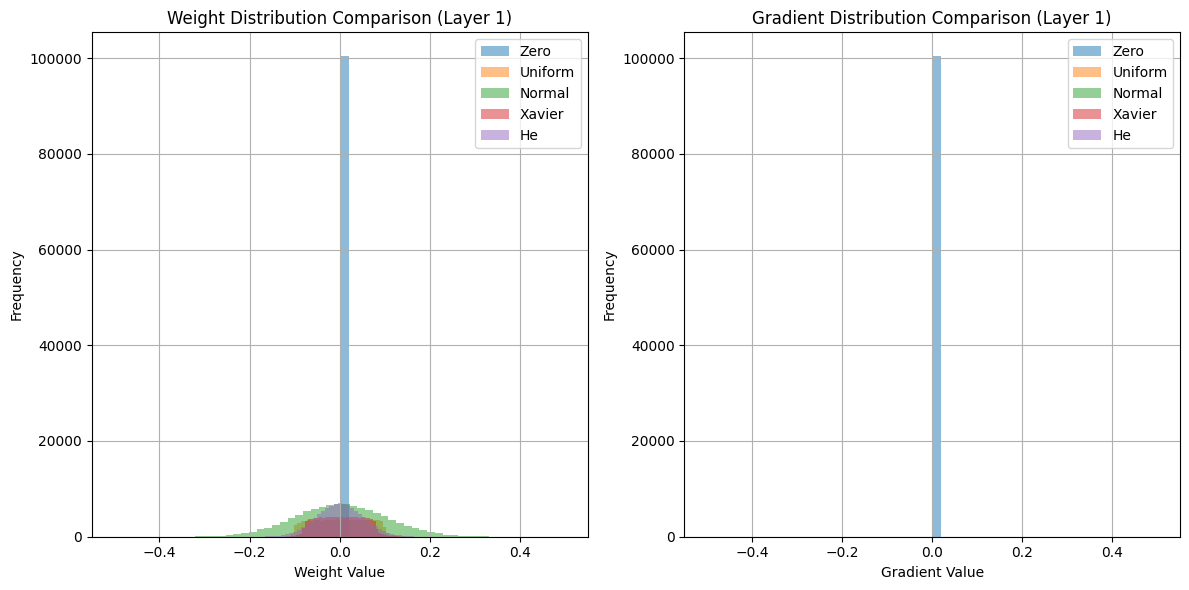


--- Accuracy Summary ---
Initializer Zero: 0.1143
Initializer Uniform: 0.9109
Initializer Normal: 0.9274
Initializer Xavier: 0.9261
Initializer He: 0.9275


In [11]:
# Variasi weight initializer
weight_initializers = {
    "Zero": ZeroInitializer(),
    "Uniform": UniformInitializer(),
    "Normal": NormalInitializer(),
    "Xavier": XavierInitializer(),
    "He": HeInitializer(),
}

results_initializers = {}
histories_initializers = {}
models_initializers = {}

for name, initializer in weight_initializers.items():
    print(f"Training model with {name} initializer")
    model_initializer = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=initializer,
    )
    history_initializer = model_initializer.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        verbose=0,
        early_stopping_patience=3,
    )

    models_initializers[name] = model_initializer
    histories_initializers[name] = history_initializer

    pred_initializer = model_initializer.forward(X_test)
    pred_classes_initializer = np.argmax(pred_initializer, axis=1)
    accuracy_initializer = np.mean(pred_classes_initializer == y_test)
    results_initializers[name] = accuracy_initializer
    
    print(f"Test Accuracy ({name} Initializer): {accuracy_initializer:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
for name in weight_initializers.keys():
    plt.plot(
        histories_initializers[name]["train_loss"], 
        label=f"Train Loss ({name})"
    )

plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
for name in weight_initializers.keys():
    plt.plot(
        histories_initializers[name]["val_loss"], 
        label=f"Validation Loss ({name})"
    )
plt.title("Perbandingan Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in models_initializers.items():
    print(f"\nWeight Distribution for {name} initializer:")
    model.plot_weight_distribution([0, 1])  # Plot for specific layers

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in models_initializers.items():
    print(f"\nGradient Distribution for {name} initializer:")
    model.plot_gradient_distribution([0, 1])  # Plot for specific layers

plt.figure(figsize=(12, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")

for name, model in models_initializers.items():
    plt.hist(
        model.layers[0].gradients['weights'].flatten(),
        bins=50, alpha=0.5, label=name,
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in results_initializers.items():
    print(f"Initializer {name}: {accuracy:.4f}")

## Perbandingan dengan MLP

In [12]:
from sklearn.neural_network import MLPClassifier

ffnn_model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "relu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_ffnn = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=50,
    momentum=0.9,
    verbose=0,
    early_stopping_patience=3,
)
pred_ffnn = ffnn_model.forward(X_test)
pred_classes_ffnn = np.argmax(pred_ffnn, axis=1)
accuracy_ffnn = np.mean(pred_classes_ffnn == y_test)
print(f"Test Accuracy (FFNN): {accuracy_ffnn:.4f}\n")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=50,
    momentum=0.9,
    random_state=42,
)
mlp_model.fit(X_train, y_train_cat.argmax(axis=1))
pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = np.mean(pred_mlp == y_test)
print(f"Test Accuracy (MLPClassifier): {accuracy_mlp:.4f}\n")

# Akurasi perbandingan
print("\n--- Accuracy Summary ---")
print(f"Custom FFNN Model: {accuracy_ffnn:.4f}")
print(f"MLPClassifier: {accuracy_mlp:.4f}")

Test Accuracy (FFNN): 0.9276

Test Accuracy (MLPClassifier): 0.9772


--- Accuracy Summary ---
Custom FFNN Model: 0.9276
MLPClassifier: 0.9772


## Eksperimen regularisasi L1 / L2


Training model with No Regularization
Test Accuracy (No Regularization): 0.9241


Training model with L1 Regularization
Test Accuracy (L1 Regularization): 0.8463


Training model with L2 Regularization
Test Accuracy (L2 Regularization): 0.9183



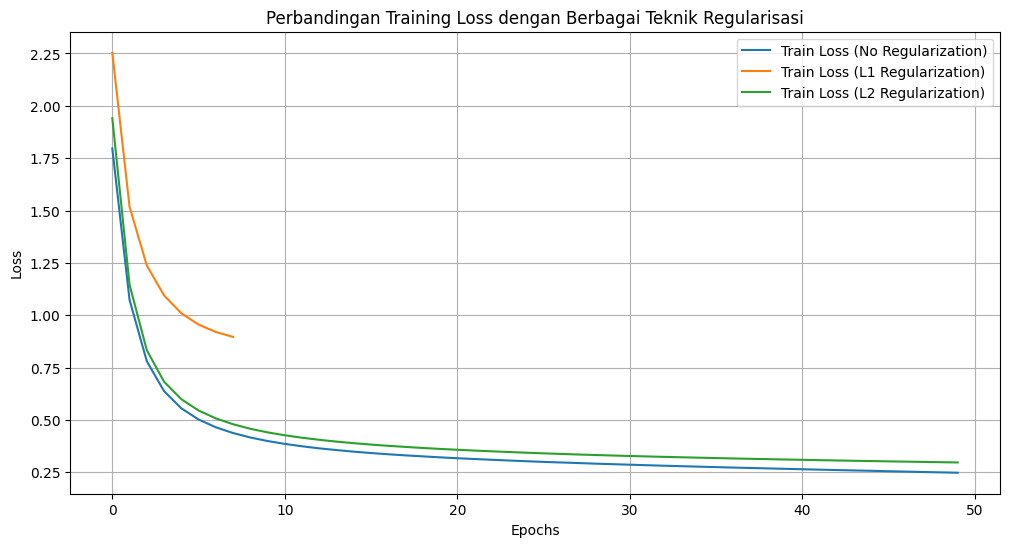

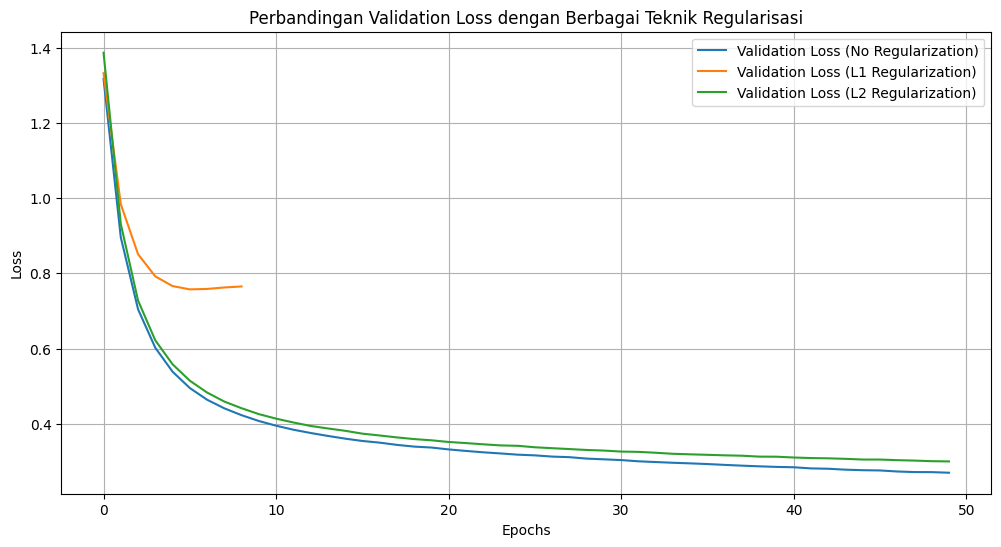


--- Individual Weight Distributions ---

Weight Distribution for No Regularization:


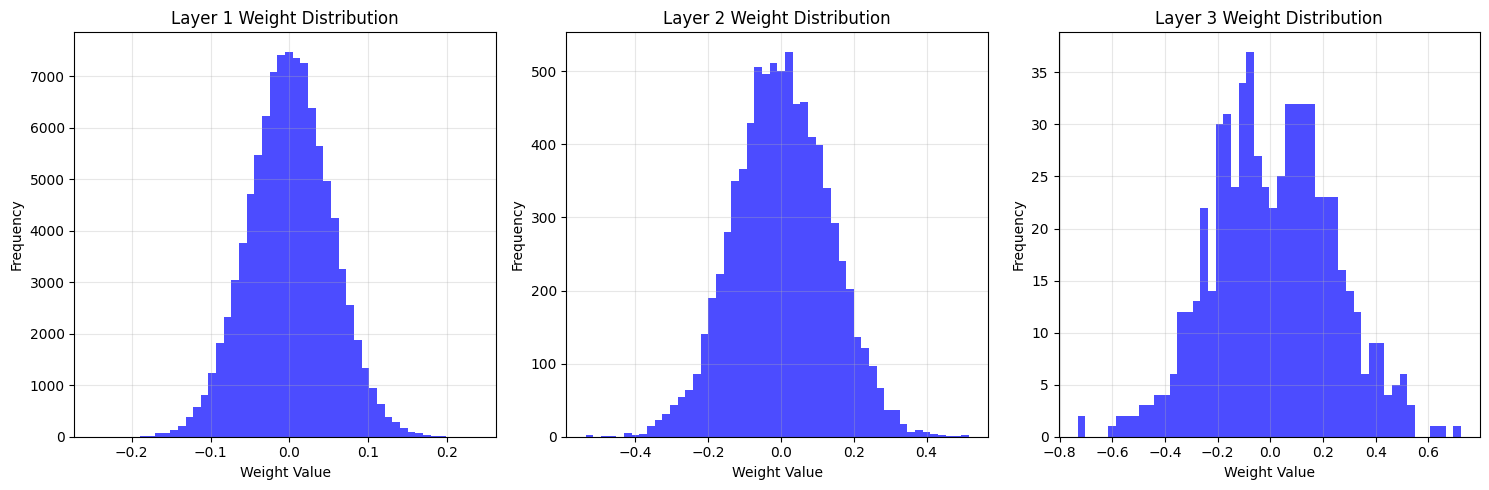


Weight Distribution for L1 Regularization:


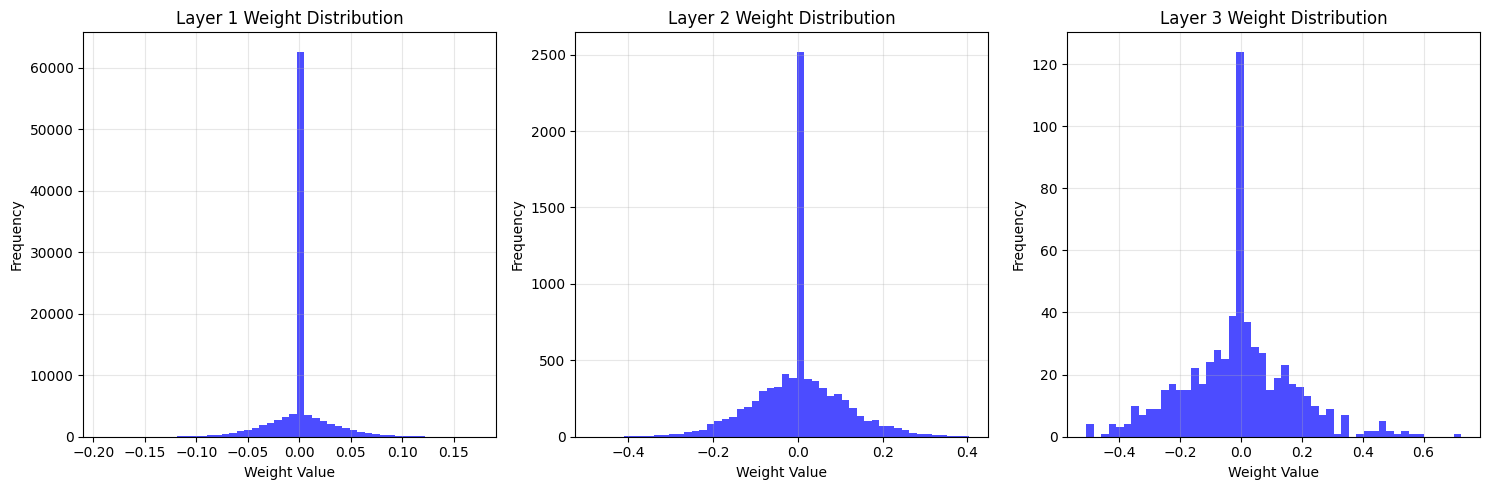


Weight Distribution for L2 Regularization:


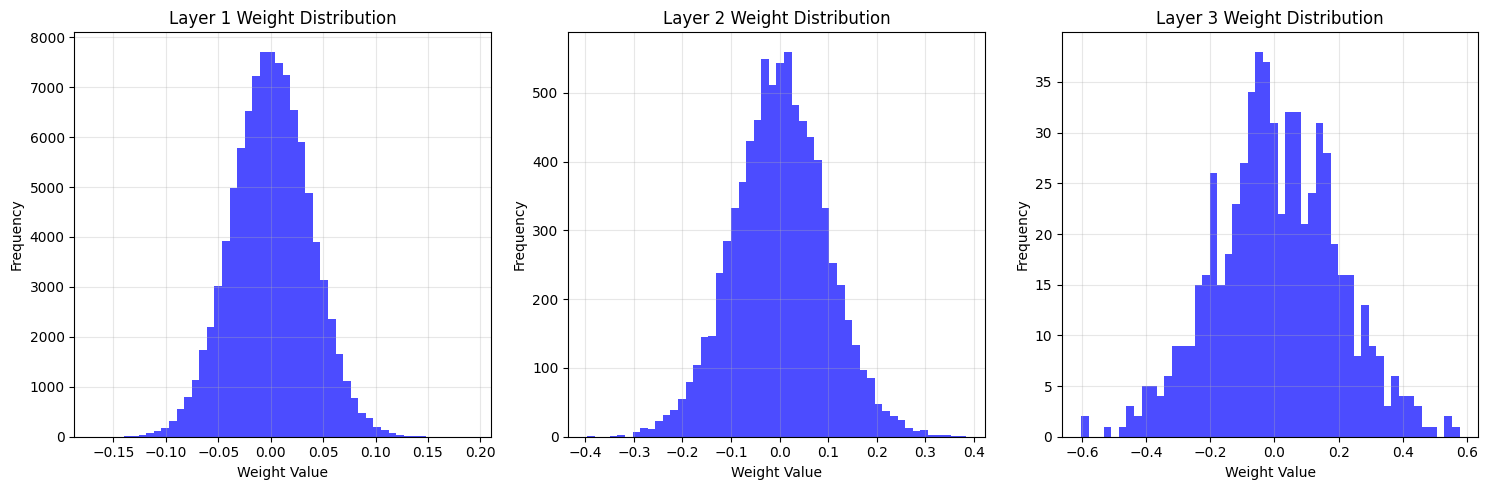


--- Individual Gradient Distributions ---

Gradient Distribution for No Regularization:


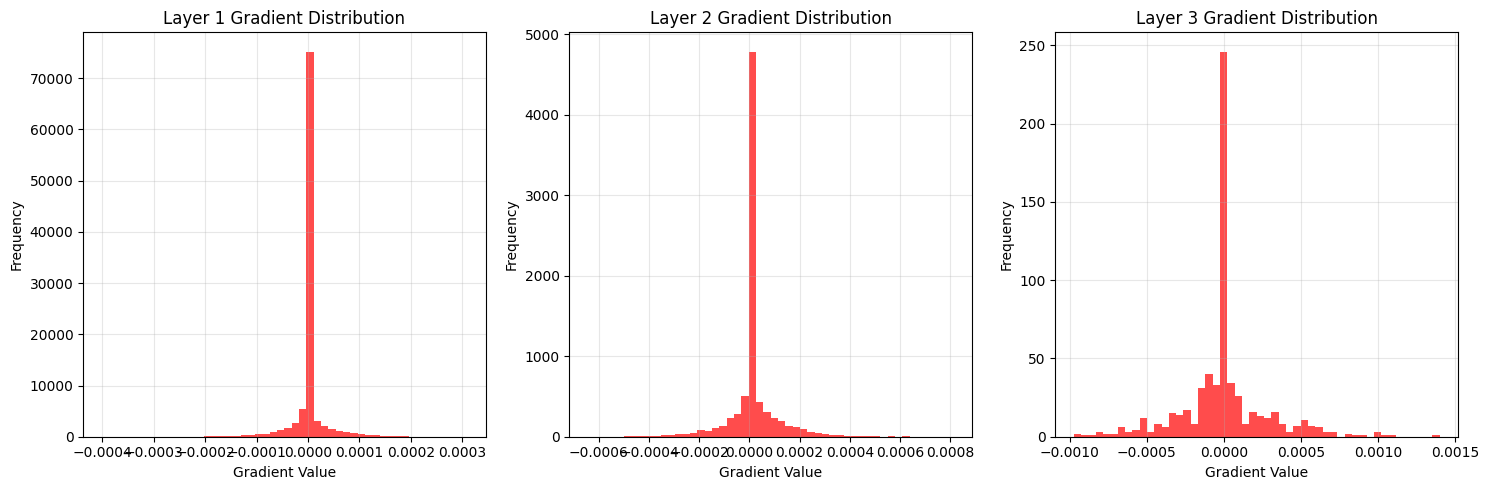


Gradient Distribution for L1 Regularization:


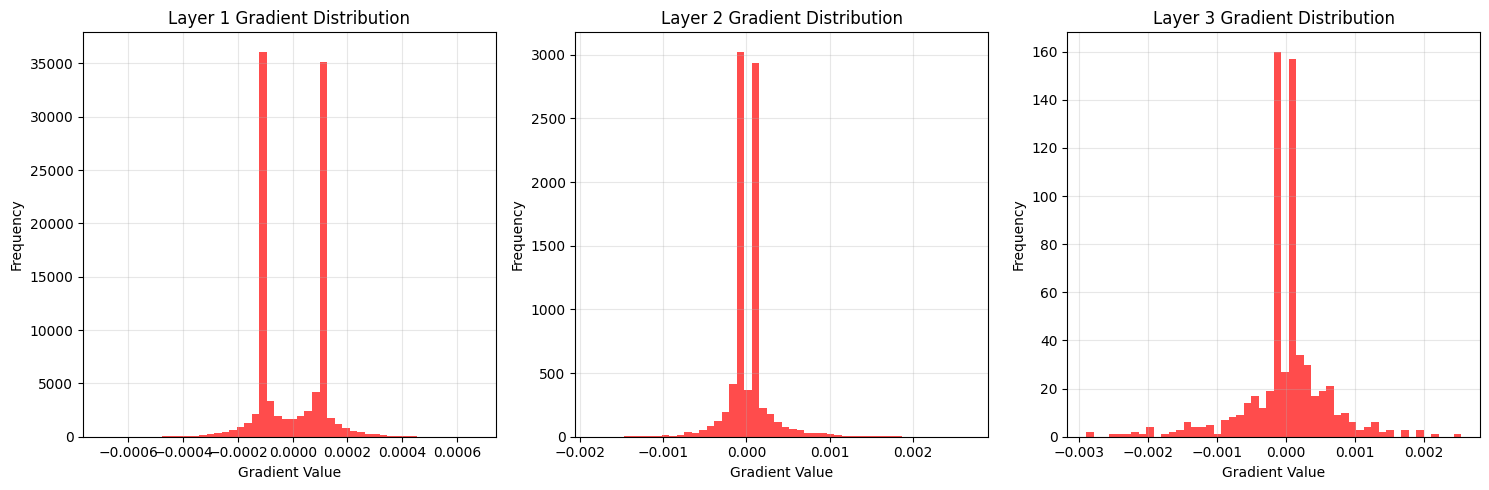


Gradient Distribution for L2 Regularization:


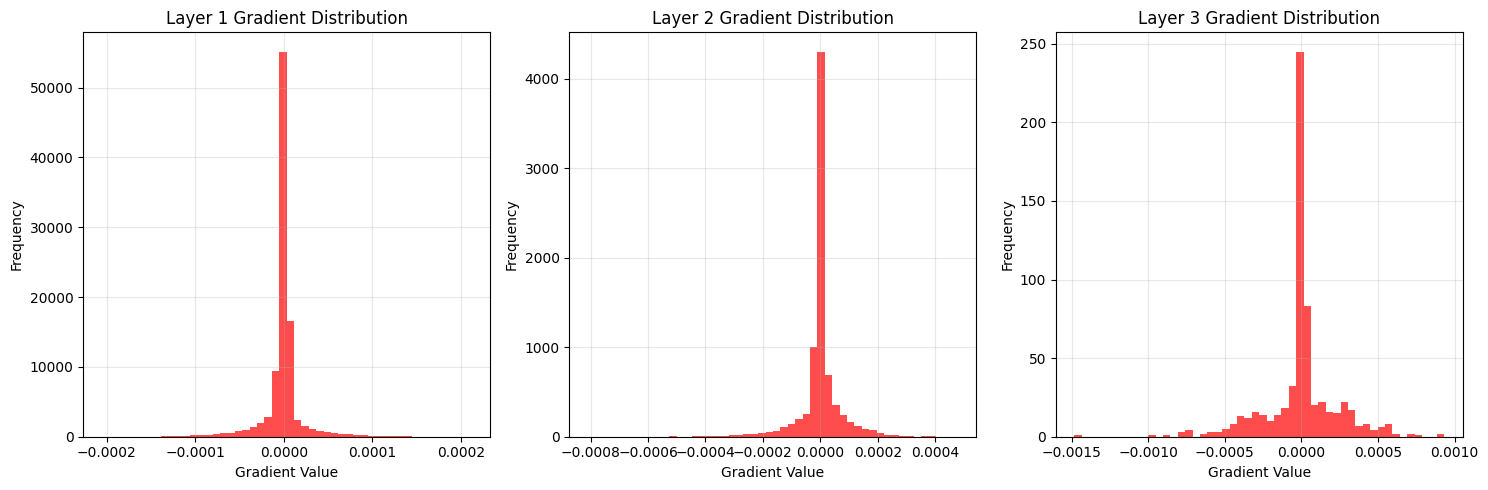

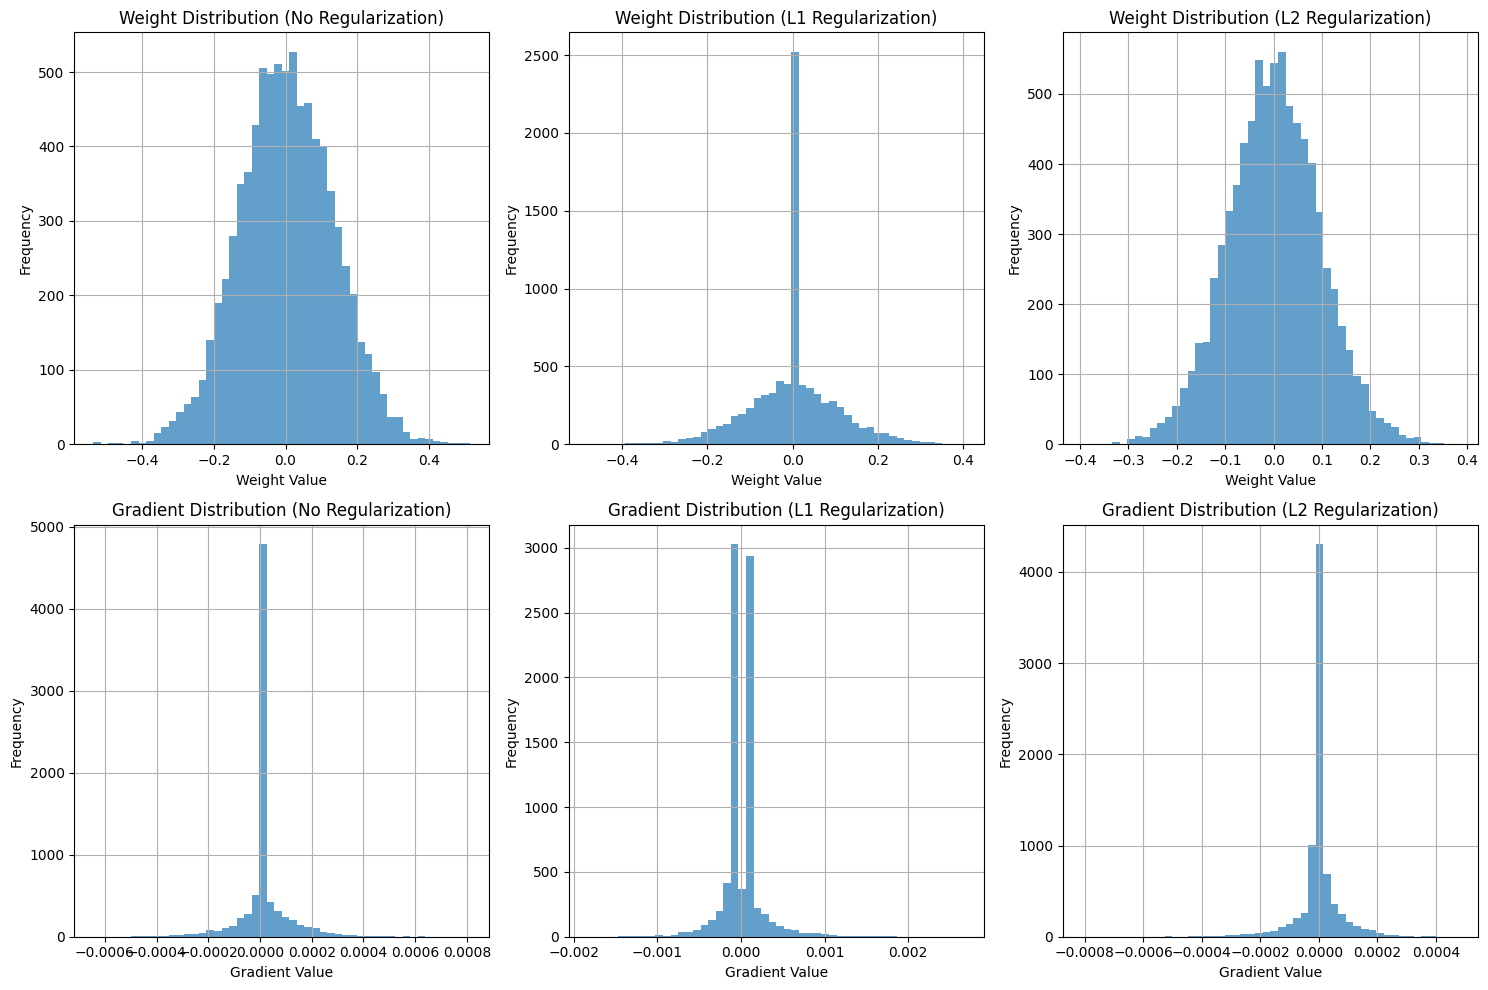


--- Accuracy Summary ---
No Regularization: 0.9241
L1 Regularization: 0.8463
L2 Regularization: 0.9183


In [13]:
regularization_results = {}
regularization_histories = {}
regularization_models = {}

reg_configs = [
    {"name": "No Regularization", "l1": 0, "l2": 0},
    {"name": "L1 Regularization", "l1": 0.0001, "l2": 0},
    {"name": "L2 Regularization", "l1": 0, "l2": 0.0001}
]

for config in reg_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        l1_lambda=config["l1"],
        l2_lambda=config["l2"],
        verbose=0,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    regularization_results[config["name"]] = accuracy
    regularization_histories[config["name"]] = history
    regularization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Berbagai Teknik Regularisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
for name, history in regularization_histories.items():
    plt.plot(history["val_loss"], label=f"Validation Loss ({name})")

plt.title("Perbandingan Validation Loss dengan Berbagai Teknik Regularisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in regularization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in regularization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 10))

# Weight distributions (top row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+1)
    plt.title(f"Weight Distribution ({name})")
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.grid()

# Gradient distributions (bottom row)
for i, (name, model) in enumerate(regularization_models.items()):
    plt.subplot(2, 3, i+4)
    plt.title(f"Gradient Distribution ({name})")
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.7
    )
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in regularization_results.items():
    print(f"{name}: {accuracy:.4f}")

## Eksperimen RMSNorm


Training model with No Normalization
Test Accuracy (No Normalization): 0.9303


Training model with RMSNorm
Test Accuracy (RMSNorm): 0.9233



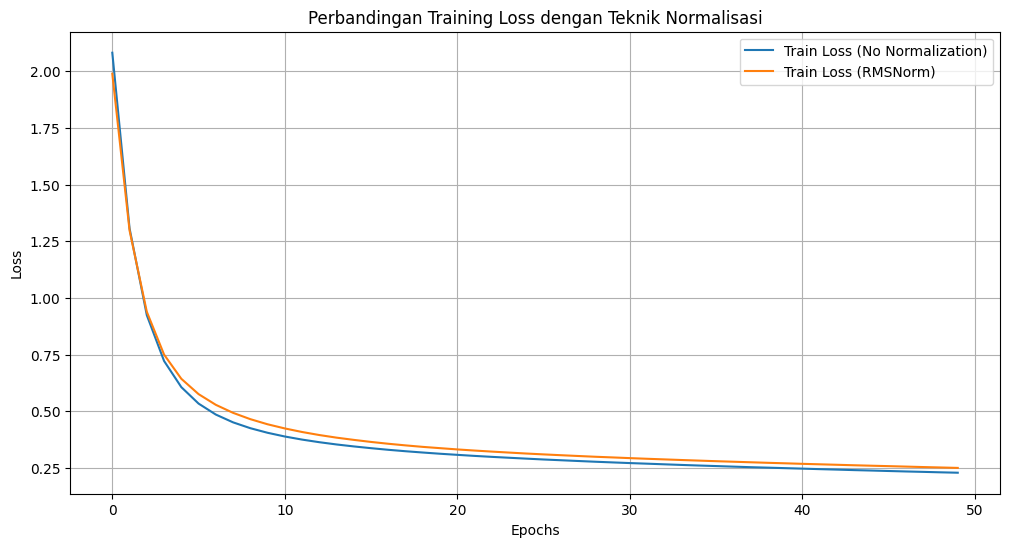

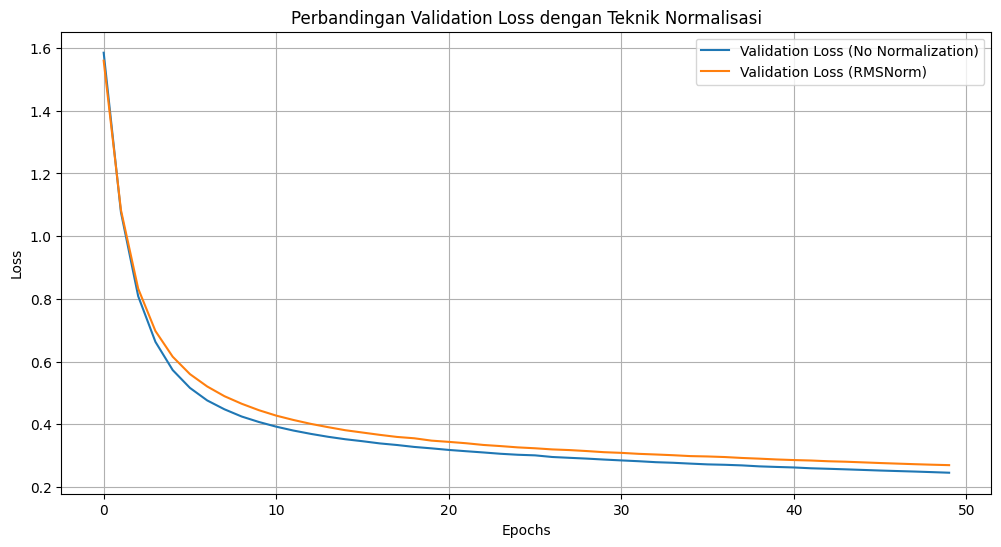


--- Individual Weight Distributions ---

Weight Distribution for No Normalization:


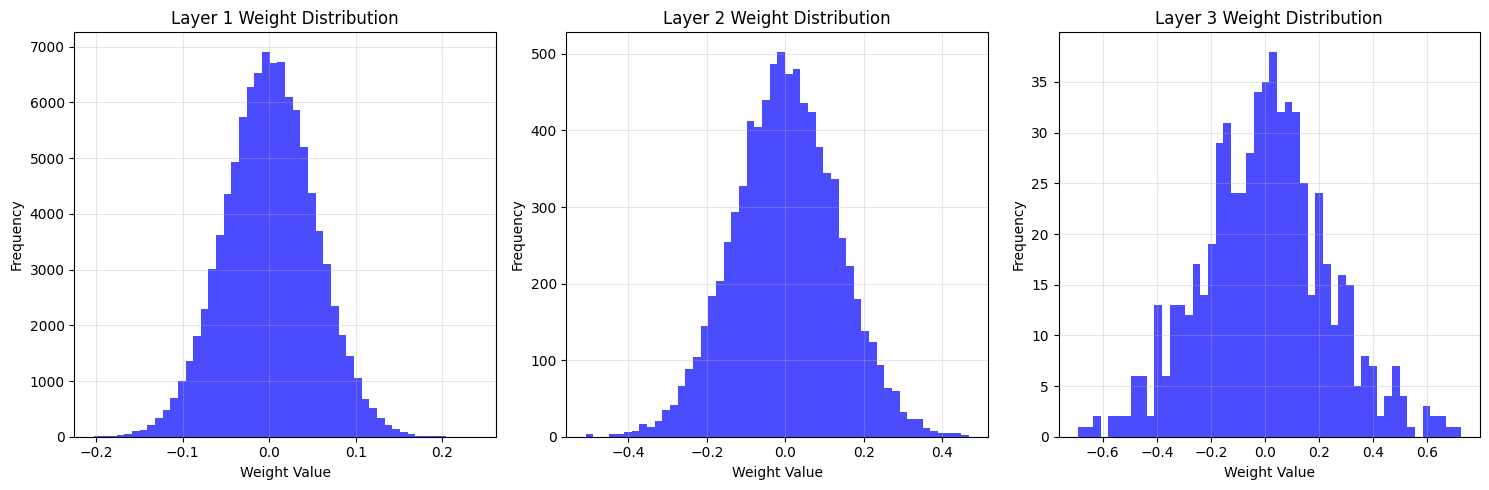


Weight Distribution for RMSNorm:


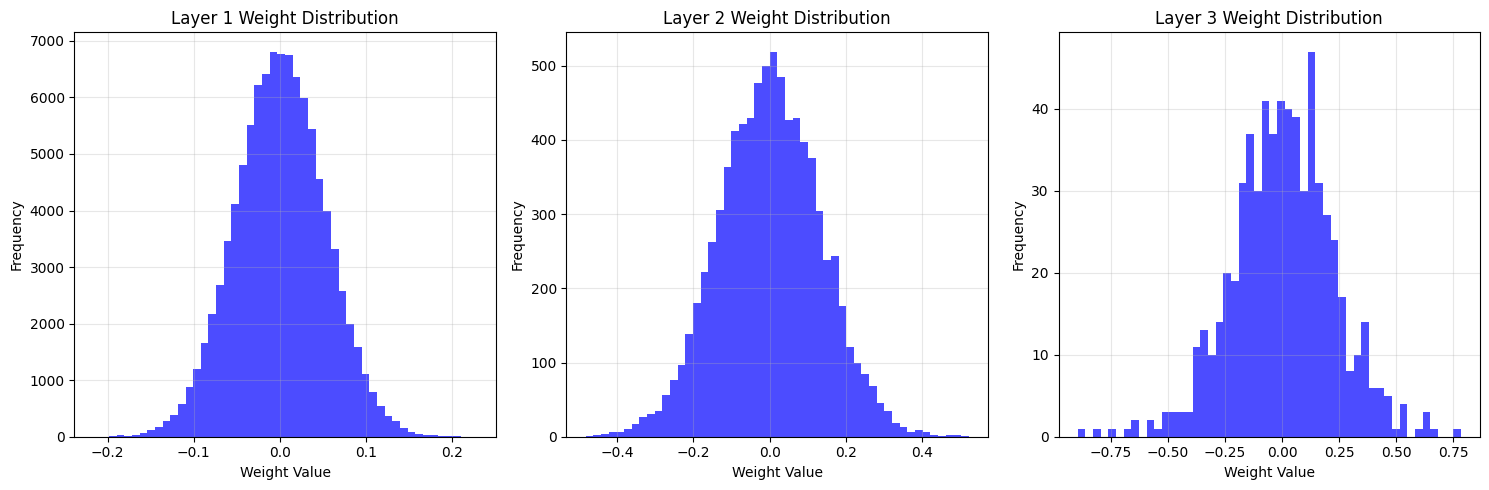


--- Individual Gradient Distributions ---

Gradient Distribution for No Normalization:


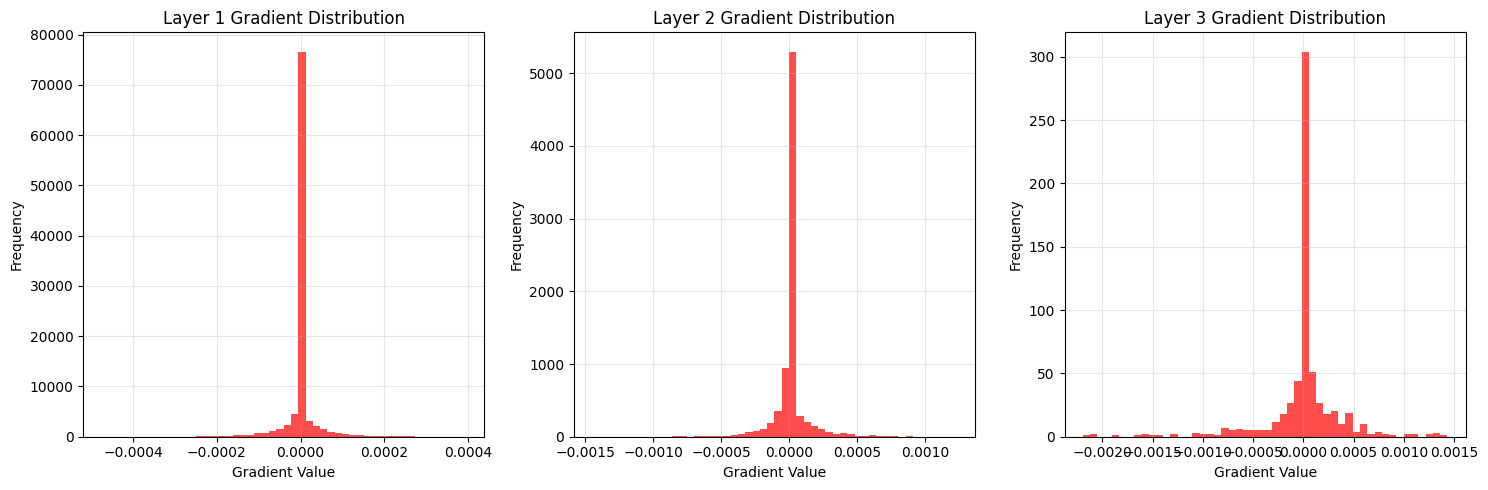


Gradient Distribution for RMSNorm:


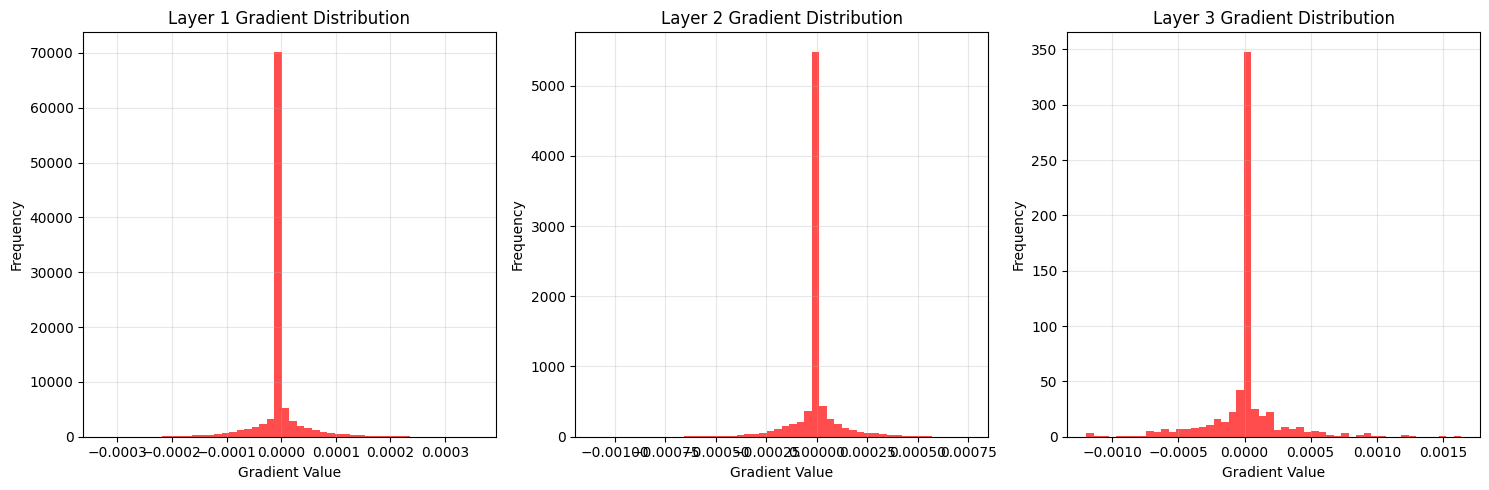

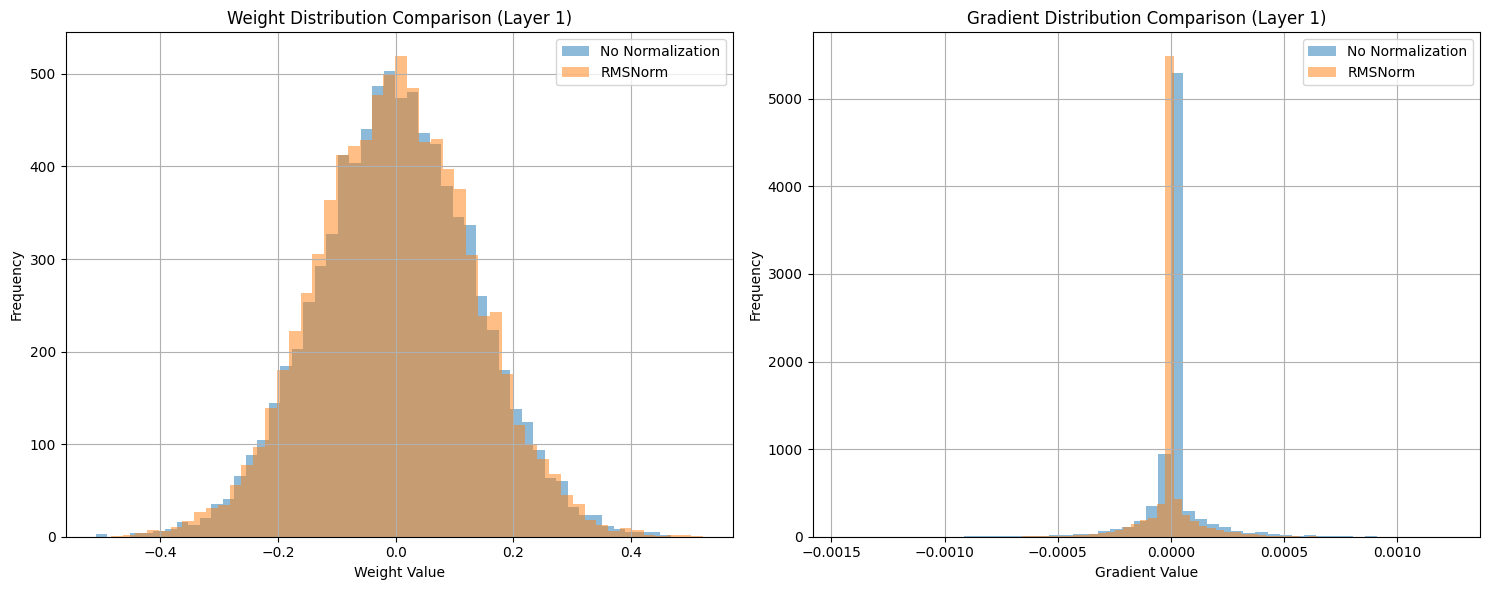


--- Accuracy Summary ---
No Normalization: 0.9303
RMSNorm: 0.9233


In [14]:
normalization_results = {}
normalization_histories = {}
normalization_models = {}

norm_configs = [
    {"name": "No Normalization", "use_rmsnorm": False},
    {"name": "RMSNorm", "use_rmsnorm": True}
]

for config in norm_configs:
    print(f"\nTraining model with {config['name']}")
    
    model = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "relu", "relu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    
    history = model.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=50,
        momentum=0.9,
        use_rmsnorm=config["use_rmsnorm"],
        verbose=0,
        early_stopping_patience=3,
    )
    
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    accuracy = np.mean(pred_classes == y_test)

    normalization_results[config["name"]] = accuracy
    normalization_histories[config["name"]] = history
    normalization_models[config["name"]] = model
    
    print(f"Test Accuracy ({config['name']}): {accuracy:.4f}\n")

# Plot perbandingan train loss
plt.figure(figsize=(12, 6))
for name, history in normalization_histories.items():
    plt.plot(history["train_loss"], label=f"Train Loss ({name})")

plt.title("Perbandingan Training Loss dengan Teknik Normalisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot perbandingan val loss
plt.figure(figsize=(12, 6))
for name, history in normalization_histories.items():
    plt.plot(history["val_loss"], label=f"Validation Loss ({name})")

plt.title("Perbandingan Validation Loss dengan Teknik Normalisasi")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot distribusi bobot untuk setiap individual model
print("\n--- Individual Weight Distributions ---")
for name, model in normalization_models.items():
    print(f"\nWeight Distribution for {name}:")
    model.plot_weight_distribution([0, 1, 2])

# Plot distribusi gradien untuk setiap individual model
print("\n--- Individual Gradient Distributions ---")
for name, model in normalization_models.items():
    print(f"\nGradient Distribution for {name}:")
    model.plot_gradient_distribution([0, 1, 2])

plt.figure(figsize=(15, 6))

# Plot perbandingan distribusi bobot
plt.subplot(1, 2, 1)
plt.title("Weight Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].parameters['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Plot perbandingan distribusi gradien
plt.subplot(1, 2, 2)
plt.title("Gradient Distribution Comparison (Layer 1)")
for name, model in normalization_models.items():
    plt.hist(
        model.layers[1].gradients['weights'].flatten(), 
        bins=50, alpha=0.5, label=name
    )
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Perbandingan akurasi
print("\n--- Accuracy Summary ---")
for name, accuracy in normalization_results.items():
    print(f"{name}: {accuracy:.4f}")